In [211]:
import os
import re
import base64
from openai import OpenAI

import requests
import json
import pandas as pd
import numpy as np
from datetime import datetime
from tqdm.notebook import tqdm
from IPython.display import display

pd.options.display.max_columns = None

In [212]:
from io import BytesIO

# Функция для загрузки изображения по URL и кодирования в base64
def url_to_base64(image_url):
    try:
        response = requests.get(image_url)
        response.raise_for_status()  # Проверка на ошибки при загрузке
        image_bytes = BytesIO(response.content).read()
        return base64.b64encode(image_bytes).decode('utf-8')
    except Exception as e:
        print(f"Ошибка при загрузке изображения {image_url}: {e}")
        return None

# Функция для обработки строки с URL-адресами
def process_image_urls(image_urls):
    if pd.isna(image_urls):  # Проверка на NaN
        return []
    urls = image_urls.split(',')  # Разделение строки на отдельные URL
    base64_images = [url_to_base64(url.strip()) for url in urls]  # Кодирование каждого изображения
    return base64_images

In [213]:
df_parsed = pd.read_csv('all.csv', sep=';')
df_sales = pd.read_csv('all_orders_encrypted_2020_small_30012024_3.csv', sep=',')
df_assortment = pd.read_csv('tsum_assortment_31012025.csv', sep=',')
df_merged = pd.merge(df_assortment, df_parsed, how='left', left_on='product_id', right_on='product_id')

categories = ['category_1', 'category_2', 'category_3', 'category_4']
df_categories = df_assortment[categories].drop_duplicates(subset=categories).reset_index(drop=True)

display(df_parsed.tail(2), df_sales.tail(2), df_assortment.tail(2), df_merged.tail(2), df_categories.tail(2))

brand_id            brand_name                   brand_code  model_id  \
110354    887837           L.B.M. 1911            l_b_m_1911-745458  13628704   
110355  13004450  Aeronautica Militare  aeronautica_militare-567861  13623853   

        article  product_id        product_name  \
110354  6945468    13575568    Шерстяной пиджак   
110355  6936225    13571759  Хлопковая футболка   

                                               image_urls      category  \
110354  https://st-cdn.tsum.com/sig/a4b305327cb47f3a68...  Mens Clothes   
110355  https://st-cdn.tsum.com/sig/e90815ed5c13fdd60f...  Mens Clothes   

        image_count  
110354            8  
110355            5

date_order user_id_eshop  product_id  net_item_rub  \
143183  2021-01-15    ihhhiijhhl    13550143       5207.69   
143184  2021-01-15    ihhhiijhhl    13550026       5207.69   

                       title color_base_title         product_created_at  \
143183  Раздельный купальник           Жёлтый  2020-05-21 00:20:28+00:00   
143184  Раздельный купальник          Розовый  2020-05-20 22:07:49+00:00   

            brand_title category_1          category_2      category_3  \
143183  MC2 Saint Barth    Детское  Одежда для девочек  Пляжная одежда   
143184  MC2 Saint Barth    Детское  Одежда для девочек  Пляжная одежда   

        category_4   price  sale_percentage  
143183  Купальники  9950.0         0.476614  
143184  Купальники  9950.0         0.476614

product_id                   title color_base_title  is_new  \
142419    13046447  Поло из шерсти и шелка            Серый   False   
142420    13046603                  Джинсы            Синий   False   

            brand_title category_1   category_2 category_3 category_4  \
142419    Stefano Ricci    Мужское       Одежда       Поло        NaN   
142420  Dolce & Gabbana    Детское  Для малышей     Одежда     Джинсы   

       category_5     price  price_with_discount material external_material  
142419        NaN  123500.0             123500.0      NaN            Шерсть  
142420        NaN   27150.0              27150.0      NaN            Хлопок

product_id                   title color_base_title  is_new  \
142419    13046447  Поло из шерсти и шелка            Серый   False   
142420    13046603                  Джинсы            Синий   False   

            brand_title category_1   category_2 category_3 category_4  \
142419    Stefano Ricci    Мужское       Одежда       Поло        NaN   
142420  Dolce & Gabbana    Детское  Для малышей     Одежда     Джинсы   

       category_5     price  price_with_discount material external_material  \
142419        NaN  123500.0             123500.0      NaN            Шерсть   
142420        NaN   27150.0              27150.0      NaN            Хлопок   

          brand_id     brand_name            brand_code    model_id  article  \
142419  12824683.0  Stefano Ricci  stefano_ricci-572099  13046423.0  5663979   
142420         NaN            NaN                   NaN         NaN      NaN   

                  product_name  \
142419  Поло из шерсти и шелка   
142420                     NaN   

                                               image_urls      category  \
142419  https://st-cdn.tsum.com/sig/a56facd05d9da017d5...  Mens Clothes   
142420                                                NaN           NaN   

        image_count  
142419          5.0  
142420          NaN

category_1  category_2  category_3 category_4
594    Детское   Косметика  Аксессуары        NaN
595    Детское  Аксессуары    Кошельки        NaN

In [214]:
df_sales

date_order user_id_eshop  product_id  net_item_rub  \
0       2020-01-19    ihhhhoajkn    12569220       3860.00   
1       2020-01-19        ijmjol    13419284      54100.00   
2       2020-01-19    ihhhhoajkn    12569223       3560.00   
3       2020-01-19        ojijkh    13401695     111000.00   
4       2020-01-19    ihhhnlkhjn    13409421      84575.00   
...            ...           ...         ...           ...   
143180  2021-01-15         `jlha    12561598       8840.00   
143181  2021-01-15         `jlha    12561604       8840.00   
143182  2021-01-15    ihhhiijhhl    13550051       5207.69   
143183  2021-01-15    ihhhiijhhl    13550143       5207.69   
143184  2021-01-15    ihhhiijhhl    13550026       5207.69   

                              title color_base_title  \
0                            Гольфы           Чёрный   
1                   Хлопковые шорты      Чёрно-белый   
2                 Капроновые гольфы           Чёрный   
3                  Замшевые ботинки          Бежевый   
4       Текстильные туфли Cardinale      Леопардовый   
...                             ...              ...   
143180              Хлопковые шорты          Красный   
143181              Хлопковые шорты          Голубой   
143182         Раздельный купальник          Голубой   
143183         Раздельный купальник           Жёлтый   
143184         Раздельный купальник          Розовый   

               product_created_at         brand_title category_1  \
0       2018-02-06 00:12:55+00:00               Falke    Женское   
1       2019-10-01 00:34:08+00:00             Balmain    Женское   
2       2018-02-06 00:12:56+00:00               Falke    Женское   
3       2019-08-24 16:24:25+00:00  Brunello Cucinelli    Женское   
4       2019-09-10 00:53:12+00:00     Dolce & Gabbana    Женское   
...                           ...                 ...        ...   
143180  2018-02-02 00:21:58+00:00     Dolce & Gabbana    Детское   
143181  2018-02-02 00:22:01+00:00     Dolce & Gabbana    Детское   
143182  2020-05-20 19:07:51+00:00     MC2 Saint Barth    Детское   
143183  2020-05-21 00:20:28+00:00     MC2 Saint Barth    Детское   
143184  2020-05-20 22:07:49+00:00     MC2 Saint Barth    Детское   

                  category_2      category_3  category_4     price  \
0                     Одежда           Бельё       Носки    4250.0   
1                     Одежда           Шорты         NaN   74500.0   
2                     Одежда           Бельё       Носки    3920.0   
3                      Обувь         Ботинки         NaN  151000.0   
4                      Обувь           Туфли         NaN   88600.0   
...                      ...             ...         ...       ...   
143180  Одежда для мальчиков           Шорты         NaN   25750.0   
143181  Одежда для мальчиков           Шорты         NaN   25750.0   
143182    Одежда для девочек  Пляжная одежда  Купальники    9950.0   
143183    Одежда для девочек  Пляжная одежда  Купальники    9950.0   
143184    Одежда для девочек  Пляжная одежда  Купальники    9950.0   

        sale_percentage  
0              0.091765  
1              0.273826  
2              0.091837  
3              0.264901  
4              0.045429  
...                 ...  
143180         0.656699  
143181         0.656699  
143182         0.476614  
143183         0.476614  
143184         0.476614  

[143185 rows x 14 columns]

In [ ]:
Убрать категории:
Нижнее бельё
Пляжная одежда
Домашняя одежда
Аксессуары

In [105]:
df_new[['category_1', 'category_2', 'category_3', 'category_4']].drop_duplicates()

category_1               category_2                    category_3  \
0           Мужское                   Одежда       Бельё и домашняя одежда   
4           Женское                    Сумки  Сумки с ручками (top-handle)   
18          Мужское                    Обувь                     Кроссовки   
22          Мужское                    Обувь                          Кеды   
34          Женское                    Обувь                          Кеды   
...             ...                      ...                           ...   
134269  Интерьер v1         Столовые приборы                           NaN   
134324  Интерьер v1  Аксессуары для кабинета                           NaN   
138625        Apple               Аксессуары              Чехлы для iPhone   
139306      Детское     Одежда для мальчиков                     Толстовки   
140049      Детское              Для малышей                        Одежда   

                         category_4  
0                             Трусы  
4                               NaN  
18                              NaN  
22                              NaN  
34                              NaN  
...                             ...  
134269                          NaN  
134324                          NaN  
138625  Чехлы для iPhone 15 Pro Max  
139306                          NaN  
140049                       Другое  

[599 rows x 4 columns]

In [73]:
df_new = pd.read_csv('tsum_assortment_sorted_04022025.csv', sep=',')
df_new

product_id                                title color_base_title  \
0         13404705            Комплект из двух боксеров           Чёрный   
1         13404721            Комплект из двух боксеров            Синий   
2         13461600            Комплект из двух боксеров            Серый   
3         13470644            Комплект из двух боксеров            Белый   
4         13446255                   Сумка Sicily small        Сиреневый   
...            ...                                  ...              ...   
140949     4590977         Мягкий энзимный пилинг (90g)       Бесцветный   
140950     4574114           Хлопковая сорочка в клетку          Голубой   
140951     4573827                        Кожаные дерби           Чёрный   
140952     4534361  Хлопковая сорочка с воротником кент          Голубой   
140953    13504491                  Солнцезащитные очки       Серебряный   

        is_new         brand_title category_1     category_2  \
0        False     Dolce & Gabbana    Мужское         Одежда   
1        False     Dolce & Gabbana    Мужское         Одежда   
2        False     Dolce & Gabbana    Мужское         Одежда   
3        False     Dolce & Gabbana    Мужское         Одежда   
4        False     Dolce & Gabbana    Женское          Сумки   
...        ...                 ...        ...            ...   
140949   False             Declare  Косметика  Уход за кожей   
140950   False               Zilli    Мужское         Одежда   
140951   False             Santoni    Мужское          Обувь   
140952   False              Brioni    Мужское         Одежда   
140953   False  UNIQUEDESIGNMILANO    Женское     Аксессуары   

                          category_3              category_4 category_5  \
0            Бельё и домашняя одежда                   Трусы        NaN   
1            Бельё и домашняя одежда                   Трусы        NaN   
2            Бельё и домашняя одежда                   Трусы        NaN   
3            Бельё и домашняя одежда                   Трусы        NaN   
4       Сумки с ручками (top-handle)                     NaN        NaN   
...                              ...                     ...        ...   
140949                      Для лица  Очищение / Эксфолиация        NaN   
140950                       Рубашки                     NaN        NaN   
140951                         Туфли                   Дерби        NaN   
140952                       Рубашки                     NaN        NaN   
140953                          Очки                     NaN        NaN   

           price  price_with_discount          material external_material  
0        13400.0              13400.0               NaN            Хлопок  
1        13400.0              13400.0               NaN            Хлопок  
2        13400.0              13400.0               NaN            Хлопок  
3        13400.0              13400.0               NaN            Хлопок  
4       209000.0             209000.0  Натуральная кожа               NaN  
...          ...                  ...               ...               ...  
140949    4950.0               4950.0               NaN               NaN  
140950  117000.0             117000.0               NaN            Хлопок  
140951   98550.0              98550.0               NaN  Натуральная кожа  
140952   73650.0              73650.0               NaN            Хлопок  
140953   35300.0              35300.0            Металл               NaN  

[140954 rows x 14 columns]

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
df_new['price'].quantile(q=0.99)

743000.0

In [ ]:
df_new[df_new['price'] <= df_new['price'].quantile(q=0.99)]['price']

In [95]:
sum(df_new['price'] < 9999)

18176

In [96]:
sum(df_new['price'] >= 9999)

122777

<Axes: xlabel='price', ylabel='Count'>

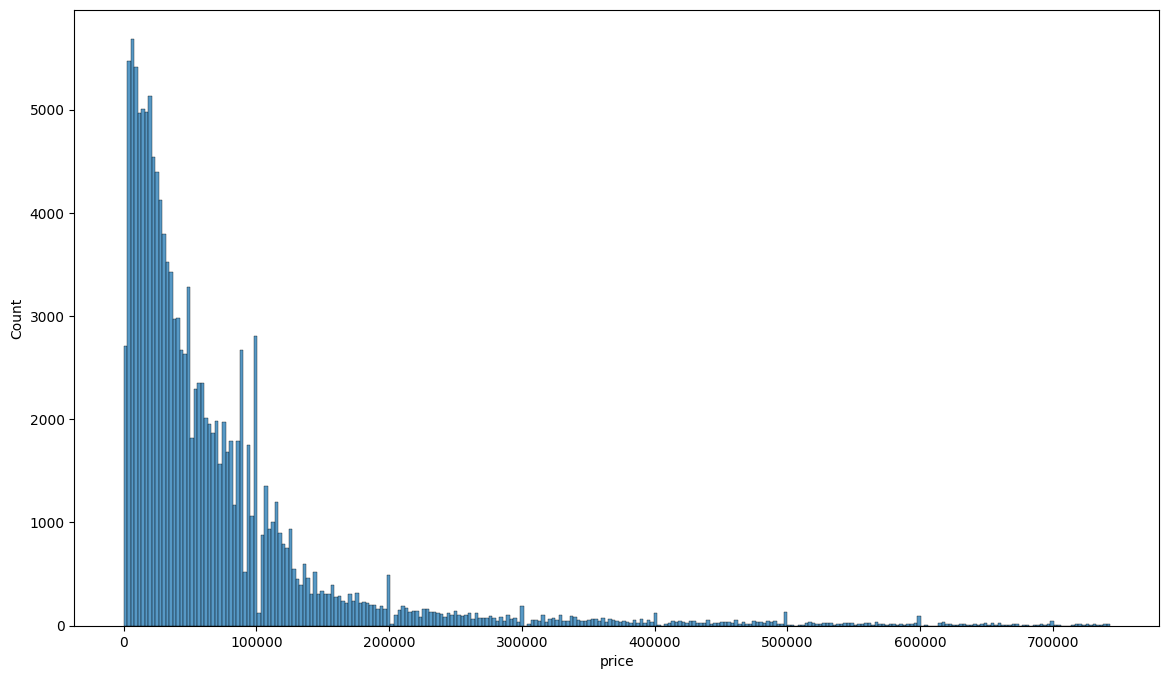

In [102]:
plt.figure(figsize=(14, 8))
sns.histplot(data=df_new[df_new['price'] <= df_new['price'].quantile(q=0.99)]['price'])

In [80]:
len(df_sales['product_id'].unique())

82234

In [77]:
len(df_new['product_id'].unique())

140954

In [216]:
for index, row in df_parsed[df_parsed['article'] == '7021849'].iterrows():   
    print(index)
    for link in row['image_urls'].split(','):
        print(link)

56930
https://st-cdn.tsum.com/sig/b72662f99c481786f5bcc42313f3fd11/width/1526/i/bf/5c/1f/b4/f43a5cd3-bcb9-4aa3-b05f-db822799b9aa.jpg
https://st-cdn.tsum.com/sig/521392f9c67bee7d3ea5c57608271c37/width/1526/i/bf/5c/1f/b4/408e3038-1450-43d6-8ae8-dca1b9c39f46.jpg
https://st-cdn.tsum.com/sig/157a029afb0c120df29b0b4aa823f000/width/1526/i/bf/5c/1f/b4/10ef50ef-8ef0-4999-828a-9155b895aebc.jpg
https://st-cdn.tsum.com/sig/a197c2ec7b25e4cae127fdfdba6514a9/width/1526/i/bf/5c/1f/b4/1ea09531-51a1-48aa-abd1-434f57ce86e3.jpg
https://st-cdn.tsum.com/sig/0d82b6ed0e7129a7798306be5b7f59b2/width/1526/i/bf/5c/1f/b4/0d587e61-b61f-46d4-9c9b-80ab7dd40e1e.jpg
https://st-cdn.tsum.com/sig/3e19d7f0f86481c1970553370a052a46/width/1526/i/bf/5c/1f/b4/2c3a4c2f-a0bd-4e60-a66a-b5a4f0d2f6ff.jpg


In [217]:
df_assortment[df_assortment['product_id'] == 13386993]

product_id                         title color_base_title  is_new  \
42914    13386993  Пуловер из шерсти и кашемира            Синий   False   

              brand_title category_1 category_2 category_3 category_4  \
42914  Brunello Cucinelli    Женское     Одежда    Свитеры        NaN   

      category_5     price  price_with_discount material external_material  
42914        NaN  212500.0             212500.0      NaN            Шерсть

In [218]:
# df_merged = df_merged[df_merged['product_id'] == 13579598]
df_merged = df_merged[df_merged['product_id'] == 13652509] # df_merged[df_merged['article'] == '7021849']
df_merged

product_id               title color_base_title  is_new brand_title  \
135994    13652509  Кашемировый свитер          Бежевый    True   Valentino   

       category_1 category_2 category_3 category_4 category_5     price  \
135994    Женское     Одежда    Свитеры        NaN        NaN  272500.0   

        price_with_discount material external_material  brand_id brand_name  \
135994             272500.0      NaN            Шерсть  194835.0  Valentino   

       brand_code    model_id  article        product_name  \
135994  valentino  13738126.0  7021849  Кашемировый свитер   

                                               image_urls        category  \
135994  https://st-cdn.tsum.com/sig/b72662f99c481786f5...  Womens Clothes   

        image_count  
135994          6.0

In [219]:
df_merged['images_base64_list'] = df_merged['image_urls'].apply(process_image_urls)
df_merged

product_id               title color_base_title  is_new brand_title  \
135994    13652509  Кашемировый свитер          Бежевый    True   Valentino   

       category_1 category_2 category_3 category_4 category_5     price  \
135994    Женское     Одежда    Свитеры        NaN        NaN  272500.0   

        price_with_discount material external_material  brand_id brand_name  \
135994             272500.0      NaN            Шерсть  194835.0  Valentino   

       brand_code    model_id  article        product_name  \
135994  valentino  13738126.0  7021849  Кашемировый свитер   

                                               image_urls        category  \
135994  https://st-cdn.tsum.com/sig/b72662f99c481786f5...  Womens Clothes   

        image_count                                 images_base64_list  
135994          6.0  [/9j/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtb...

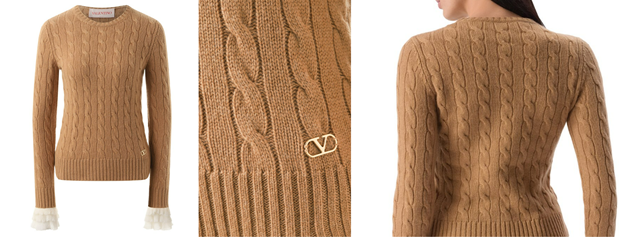

In [220]:
for link in df_merged[df_merged['product_id'] == 13652509].iloc[0]['image_urls'].split(","):
    print(link.strip())  # Выводим каждую ссылку отдельно для скачивания вручную

https://st-cdn.tsum.com/sig/b72662f99c481786f5bcc42313f3fd11/width/1526/i/bf/5c/1f/b4/f43a5cd3-bcb9-4aa3-b05f-db822799b9aa.jpg
https://st-cdn.tsum.com/sig/521392f9c67bee7d3ea5c57608271c37/width/1526/i/bf/5c/1f/b4/408e3038-1450-43d6-8ae8-dca1b9c39f46.jpg
https://st-cdn.tsum.com/sig/157a029afb0c120df29b0b4aa823f000/width/1526/i/bf/5c/1f/b4/10ef50ef-8ef0-4999-828a-9155b895aebc.jpg
https://st-cdn.tsum.com/sig/a197c2ec7b25e4cae127fdfdba6514a9/width/1526/i/bf/5c/1f/b4/1ea09531-51a1-48aa-abd1-434f57ce86e3.jpg
https://st-cdn.tsum.com/sig/0d82b6ed0e7129a7798306be5b7f59b2/width/1526/i/bf/5c/1f/b4/0d587e61-b61f-46d4-9c9b-80ab7dd40e1e.jpg
https://st-cdn.tsum.com/sig/3e19d7f0f86481c1970553370a052a46/width/1526/i/bf/5c/1f/b4/2c3a4c2f-a0bd-4e60-a66a-b5a4f0d2f6ff.jpg


In [221]:
df_categories = df_merged[df_merged['product_id'] == 13652509][categories].drop_duplicates().reset_index(drop=True)
df_categories

category_1 category_2 category_3 category_4
0    Женское     Одежда    Свитеры        NaN

## API

### openrouter.ai

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

api_key = os.getenv("OPEN_ROUTER_API_KEY")

In [223]:
url = "https://openrouter.ai/api/v1/models"
headers = {"Authorization": f"Bearer {api_key}"}

response = requests.get(url, headers=headers)

df_models = pd.json_normalize(response.json()['data'])
df_models["created_dt"] = pd.to_datetime(df_models["created"], unit="s")
df_models.sort_values(by='created_dt', ascending=True).tail(3)

id                           name  \
2            google/gemini-2.0-flash-001       Google: Gemini Flash 2.0   
1  deepseek/deepseek-r1-distill-llama-8b  DeepSeek: R1 Distill Llama 8B   
0          allenai/llama-3.1-tulu-3-405b          Llama 3.1 Tulu 3 405b   

      created                                        description  \
2  1738769413  Gemini Flash 2.0 offers a significantly faster...   
1  1738937718  DeepSeek R1 Distill Llama 8B is a distilled la...   
0  1739053421  Tülu 3 405B is the largest model in the Tülu 3...   

   context_length per_request_limits architecture.modality  \
2         1000000               None      text+image->text   
1           32000               None            text->text   
0           16000               None            text->text   

  architecture.tokenizer architecture.instruct_type pricing.prompt  \
2                 Gemini                       None      0.0000001   
1                 Llama3                       None     0.00000004   
0                  Other                       None       0.000005   

  pricing.completion pricing.image pricing.request  \
2          0.0000004             0               0   
1         0.00000004             0               0   
0            0.00001             0               0   

   top_provider.context_length  top_provider.max_completion_tokens  \
2                    1000000.0                              8192.0   
1                      32000.0                             32000.0   
0                      16000.0                                 NaN   

   top_provider.is_moderated          created_dt  
2                      False 2025-02-05 15:30:13  
1                      False 2025-02-07 14:15:18  
0                      False 2025-02-08 22:23:41

In [224]:
df_models[(df_models['architecture.tokenizer'] == 'GPT') & 
        ((df_models['architecture.modality'] == 'text+image->text'))].sort_values(by='pricing.image', ascending=False).reset_index(drop=True)

id                              name  \
0                      openai/o1                        OpenAI: o1   
1             openai/gpt-4-turbo               OpenAI: GPT-4 Turbo   
2       openai/chatgpt-4o-latest                OpenAI: ChatGPT-4o   
3             openai/gpt-4o-mini               OpenAI: GPT-4o-mini   
4  openai/gpt-4o-mini-2024-07-18  OpenAI: GPT-4o-mini (2024-07-18)   
5       openai/gpt-4o-2024-05-13       OpenAI: GPT-4o (2024-05-13)   
6         openai/gpt-4o:extended         OpenAI: GPT-4o (extended)   
7       openai/gpt-4o-2024-11-20       OpenAI: GPT-4o (2024-11-20)   
8       openai/gpt-4o-2024-08-06       OpenAI: GPT-4o (2024-08-06)   
9                  openai/gpt-4o                    OpenAI: GPT-4o   

      created                                        description  \
0  1734459999  The latest and strongest model family from Ope...   
1  1712620800  The latest GPT-4 Turbo model with vision capab...   
2  1723593600  OpenAI ChatGPT 4o is continually updated by Op...   
3  1721260800  GPT-4o mini is OpenAI's newest model after [GP...   
4  1721260800  GPT-4o mini is OpenAI's newest model after [GP...   
5  1715558400  GPT-4o ("o" for "omni") is OpenAI's latest AI ...   
6  1715558400  GPT-4o ("o" for "omni") is OpenAI's latest AI ...   
7  1732127594  The 2024-11-20 version of GPT-4o offers a leve...   
8  1722902400  The 2024-08-06 version of GPT-4o offers improv...   
9  1715558400  GPT-4o ("o" for "omni") is OpenAI's latest AI ...   

   context_length per_request_limits architecture.modality  \
0          200000               None      text+image->text   
1          128000               None      text+image->text   
2          128000               None      text+image->text   
3          128000               None      text+image->text   
4          128000               None      text+image->text   
5          128000               None      text+image->text   
6          128000               None      text+image->text   
7          128000               None      text+image->text   
8          128000               None      text+image->text   
9          128000               None      text+image->text   

  architecture.tokenizer architecture.instruct_type pricing.prompt  \
0                    GPT                       None       0.000015   
1                    GPT                       None        0.00001   
2                    GPT                       None       0.000005   
3                    GPT                       None     0.00000015   
4                    GPT                       None     0.00000015   
5                    GPT                       None       0.000005   
6                    GPT                       None       0.000006   
7                    GPT                       None      0.0000025   
8                    GPT                       None      0.0000025   
9                    GPT                       None      0.0000025   

  pricing.completion pricing.image pricing.request  \
0            0.00006      0.021675               0   
1            0.00003       0.01445               0   
2           0.000015      0.007225               0   
3          0.0000006      0.007225               0   
4          0.0000006      0.007225               0   
5           0.000015      0.007225               0   
6           0.000018      0.007225               0   
7            0.00001      0.003613               0   
8            0.00001      0.003613               0   
9            0.00001      0.003613               0   

   top_provider.context_length  top_provider.max_completion_tokens  \
0                     200000.0                            100000.0   
1                     128000.0                              4096.0   
2                     128000.0                             16384.0   
3                     128000.0                             16384.0   
4                     128000.0                             16384.0   
5                     128000.0           

## Генерация шаблонов по категориям

In [225]:
def generate_text(user_prompt, system_prompt, template_name, api_key, model='openai/o1'):
    """
    Отправляет запрос к API OpenRouter для генерации шаблона атрибутов товара на основе переданных параметров.

    Параметры:
    - user_prompt (str): Текст запроса, содержащий описание задачи для модели.
    - system_prompt (str): Постановка задачи для модели на уровне инструкций.
    - template_name (str): Название шаблона атрибутов (например, "Базовые визуальные характеристики").
    - api_key (str): Ключ API для аутентификации запроса.
    - model (str, optional): Название используемой модели. По умолчанию 'openai/o1-preview'.

    Возвращает:
    - requests.Response: Если запрос успешен (код 200), возвращает ответ API.
    - str: Сообщение об ошибке в случае неудачного запроса.
    """
    
    url = "https://openrouter.ai/api/v1/chat/completions"
    
    headers = {
        "Authorization": f"Bearer {api_key}"
    }

    data = {
        "model": model,
        "messages": [
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": user_prompt},
                ]
            }
        ],
        "temperature": 0,  # Управляет случайностью: 0 - детерминированный ответ, >0 - больше креативности
        "top_p": 1,  # Ядерная выборка: 1 - все токены учитываются, <1 - ограничение вероятных вариантов
        # "frequency_penalty": 0,  # Штраф за повторение слов: >0 уменьшает частоту повторений
        # "presence_penalty": 0,  # Штраф за повторение идей: >0 увеличивает разнообразие темы
        # "repetition_penalty": 1,  # Контроль повторений: >1 снижает повторяемость фраз
        # "top_k": 0  # Ограничение выборки: 0 - без ограничения, >0 - только среди k самых вероятных токенов
        # "max_tokens": 1000, # Ограничение длины ответа
        "seed": 0,  # Фиксированное значение для воспроизводимости
    }

    try:
        response = requests.post(url, headers=headers, json=data)
        
        if response.status_code == 200:
            return response
        else:
            return f"Ошибка: {response.status_code}\n{response.text}"
    except Exception as e:
        return f"Ошибка при генерации описания: {str(e)}"

In [226]:
url = "https://openrouter.ai/api/v1/auth/key"
headers = {
    "Authorization": f"Bearer {api_key}"
}
response = requests.get(url, headers=headers)
print(f'Потрачено на текущий момент: {response.json()['data']['usage']}')

Потрачено на текущий момент: 28.84256


In [227]:
templates = ['Базовые визуальные характеристики', 'Конструктивные элементы', 'Стилистические параметры', 'Контекстные данные', 
             'Технические характеристики', 'Маркетинговые параметры', 'Поведенческие данные', 'Экспертная оценка']

for template_name in templates:
    df_categories[f'Шаблон {template_name}'] = None
    df_categories[f'Шаблон {template_name} response_json'] = None

for index, row in tqdm(df_categories.iterrows(), total=df_categories.shape[0], desc='Обработка категорий'):
    
    categories_string = ", ".join(filter(pd.notna, [row['category_1'], row['category_2'], row['category_3'], row['category_4']]))
    
    for template_name in tqdm(templates, desc='Создание шаблонов'):
    
        user_prompt = f'''
Создай максимально подробный шаблон «{template_name}» в JSON-подобной структуре со всеми возможными атрибутами для категории: {categories_string}.
Структура должна иметь один уровень вложенности (самый верхний единственный).
Формат ответа:
{{
    "Атрибут 1": "", 
    "Атрибут 2": "",
    ...
}}
'''
        system_prompt = f'''
Ты — ассистент, который формирует подробный детализированный список атрибутов для товаров люксовых брендов из ЦУМа. 
Тебе будут переданы до четырёх уровней категорий (category_1, category_2, category_3, category_4) и название шаблона (template_name).
Твоя задача — вернуть структурированный перечень (JSON-подобную структуру) атрибутов, которые релевантны для каждого конкретного шаблона и категории.

Требования к формату ответа:
1. Выдай только структуру с названиями атрибутов, без лишних описаний и пояснений.  
2. Учитывай, что товары относятся к сегменту люксовых брендов — это может влиять на состав атрибутов.
3. Не добавляй комментарии или формулировки за пределами списка атрибутов.
4. Названия атрибутов строго на русском языке.
'''
        
        response_json = generate_text(user_prompt=user_prompt, system_prompt=system_prompt, template_name=template_name, 
                                      api_key=api_key, model='openai/o1').json()
        template = response_json["choices"][0]["message"]["content"]
    
        df_categories.at[index, f'Шаблон {template_name}'] = template
        df_categories.at[index, f'Шаблон {template_name} response_json'] = response_json

Обработка категорий:   0%|          | 0/1 [00:00<?, ?it/s]

Создание шаблонов:   0%|          | 0/8 [00:00<?, ?it/s]

In [228]:
url = "https://openrouter.ai/api/v1/auth/key"
headers = {
    "Authorization": f"Bearer {api_key}"
}
response = requests.get(url, headers=headers)
print(f'Потрачено на текущий момент: {response.json()['data']['usage']}')

Потрачено на текущий момент: 28.88764625


In [229]:
28.88764625 - 28.84256

0.04508625000000066

In [230]:
df_categories

category_1 category_2 category_3 category_4  \
0    Женское     Одежда    Свитеры        NaN   

            Шаблон Базовые визуальные характеристики  \
0  {\n    "Цвет": "",\n    "Принт": "",\n    "Отд...   

  Шаблон Базовые визуальные характеристики response_json  \
0  {'id': 'gen-1739111571-lzZLYAeMQqzEkXK0sxI9', ...       

                      Шаблон Конструктивные элементы  \
0  {\n    "Тип трикотажа": "",\n    "Вид вязки": ...   

        Шаблон Конструктивные элементы response_json  \
0  {'id': 'gen-1739111594-Vh64g2jVLJaw9Smp3jrI', ...   

                     Шаблон Стилистические параметры  \
0  {\n    "Стиль": "",\n    "Силуэт": "",\n    "Т...   

       Шаблон Стилистические параметры response_json  \
0  {'id': 'gen-1739111624-8JCzyzKlYglJvYEJnuwv', ...   

                           Шаблон Контекстные данные  \
0  {\n    "Бренд": "",\n    "Линия бренда": "",\n...   

             Шаблон Контекстные данные response_json  \
0  {'id': 'gen-1739111650-WGQhn5vtyJftJMgLGJru', ...   

                   Шаблон Технические характеристики  \
0  {\n    "Бренд": "",\n    "Линия бренда": "",\n...   

     Шаблон Технические характеристики response_json  \
0  {'id': 'gen-1739111668-qENid8qHD6o3V86t5eHx', ...   

                      Шаблон Маркетинговые параметры  \
0  {\n    "Бренд": "",\n    "Линия бренда": "",\n...   

        Шаблон Маркетинговые параметры response_json  \
0  {'id': 'gen-1739111703-0Pha80NmCEIiWH0OrbRY', ...   

                         Шаблон Поведенческие данные  \
0  {\n    "Назначение": "",\n    "Тип активности"...   

           Шаблон Поведенческие данные response_json  \
0  {'id': 'gen-1739111728-YqCipC2XNbgQNKIyJWv7', ...   

                            Шаблон Экспертная оценка  \
0  {\n    "Бренд": "",\n    "Линия бренда": "",\n...   

              Шаблон Экспертная оценка response_json  
0  {'id': 'gen-1739111756-lgwhXZnT9UDCEEeQmx57', ...

In [231]:
def review_templates(df, templates, api_key, model='openai/o1'):
    """
    Проверяет и удаляет дублирующиеся атрибуты, оставляя их только в наиболее релевантном шаблоне.
    
    Параметры:
    - df: DataFrame с шаблонами.
    - templates: Список названий шаблонов.
    - api_key: Ключ API OpenRouter.
    - model: Название модели для API.

    Возвращает:
    - df: Обновлённый DataFrame без дубликатов атрибутов.
    """
    # Собираем все атрибуты из шаблонов
    attribute_to_templates = {}  # { "Атрибут": ["Шаблон 1", "Шаблон 2", ...] }
    template_data = {}  # Хранит JSON каждого шаблона

    for template_name in templates:
        column_name = f'Шаблон {template_name}'
        for index, row in df.iterrows():
            try:
                template_json = json.loads(row[column_name])
                template_data[(index, template_name)] = template_json

                for attr in template_json.keys():
                    if attr not in attribute_to_templates:
                        attribute_to_templates[attr] = []
                    attribute_to_templates[attr].append(template_name)

            except json.JSONDecodeError:
                continue  # Пропускаем ошибки в JSON

    # Отбираем атрибуты, которые встречаются в нескольких шаблонах
    duplicate_attributes = {attr: templates for attr, templates in attribute_to_templates.items() if len(templates) > 1}

    # GPT будет определять, к какому шаблону лучше оставить атрибут
#     user_prompt = f"""
# У меня есть список атрибутов товаров, которые встречаются в нескольких шаблонах. 
# Твоя задача — определить, в каком из шаблонов каждому атрибуту место (оставить только в одном).  

# Формат ответа:
# {{
#     "Атрибут 1": "Правильный шаблон",
#     "Атрибут 2": "Правильный шаблон",
#     ...
# }}

# Список атрибутов и шаблонов:
# {json.dumps(duplicate_attributes, ensure_ascii=False, indent=2)}
# """

#     system_prompt = f"""
# Ты — умный ассистент, который помогает определить, к какому шаблону лучше отнести каждый атрибут товара.  
# Твоя цель — выбрать для каждого атрибута только один правильный шаблон, основываясь на логике распределения атрибутов.  

# Требования:
# 1. Если атрибут явно соответствует какому-либо шаблону больше других, выбери его.
# 2. Если атрибут встречается в нескольких шаблонах, но подходит к одному из них по смыслу, контексту или структуре данных, оставь его только в этом шаблоне.
# 3. Если атрибут равнозначен для нескольких шаблонов, выбери наиболее общий или наиболее специализированный (если это явно предпочтительнее).
# 4. Формат ответа строго JSON.
# 5. Не создавай новых атрибутов или шаблонов.
# """

    user_prompt = f"""
Есть список атрибутов, которые встречаются в нескольких шаблонах. 
Определи, в каком шаблоне должен остаться каждый атрибут (оставляем только в одном).

Формат JSON:
{{
    "Атрибут 1": "Шаблон",
    "Атрибут 2": "Шаблон"
}}

Данные:
{json.dumps(duplicate_attributes, ensure_ascii=False, indent=2)}
"""

    system_prompt = f"""
Ты распределяешь атрибуты по шаблонам.

Правила:
1. Выбери для каждого атрибута 1 шаблон.
2. Учитывай смысл, контекст и структуру данных.
3. Если выбор сложный, предпочитай более общий или специализированный шаблон.
4. Ответ — только JSON.
"""
    
    max_retries = 3  # Максимальное количество попыток
    attempt = 0
    
    while attempt < max_retries:
        try:
            response_json = generate_text(user_prompt=user_prompt, system_prompt=system_prompt, 
                                          template_name="Дедупликация атрибутов", api_key=api_key, model=model).json()
            
            if not response_json or "choices" not in response_json or not response_json["choices"]:
                raise ValueError("Ответ от модели пустой или некорректный.")
    
            raw_content = response_json["choices"][0]["message"]["content"].strip()
    
            # Фильтрация только JSON-объекта из текста
            match = re.search(r'\{.*\}', raw_content, re.DOTALL)
            if not match:
                raise ValueError(f"Ответ модели не содержит корректный JSON: {raw_content}")
    
            cleaned_content = match.group(0) # Берём только найденный JSON
    
            correct_assignments = json.loads(cleaned_content)
            break
    
        except (KeyError, json.JSONDecodeError, ValueError) as e:
            attempt += 1
            print(f"Ошибка при разборе ответа модели: {e}. Попытка {attempt} из {max_retries}")
            
            if attempt == max_retries:
                print("Достигнут максимальный предел попыток. Завершаю выполнение.")
                return df 

    # Удаляем дубликаты из нецелевых шаблонов
    for (index, template_name), template_json in template_data.items():
        updated_template = {attr: value for attr, value in template_json.items() if attr not in correct_assignments or correct_assignments[attr] == template_name}
        df.at[index, f'Шаблон {template_name}'] = json.dumps(updated_template, ensure_ascii=False)

    return df

In [2]:
print('{\n  \"Силуэт\": \"Базовые визуальные характеристики\",\n  \"Тип посадки\": \"Конструктивные элементы\",\n  \"Тип застёжки\": \"Конструктивные элементы\",\n  \"Наличие гульфика\": \"Конструктивные элементы\",\n  \"Декоративные элементы\": \"Стилистические параметры\",\n  \"Фактура материала\": \"Базовые визуальные характеристики\"\n}')

{
  "Силуэт": "Базовые визуальные характеристики",
  "Тип посадки": "Конструктивные элементы",
  "Тип застёжки": "Конструктивные элементы",
  "Наличие гульфика": "Конструктивные элементы",
  "Декоративные элементы": "Стилистические параметры",
  "Фактура материала": "Базовые визуальные характеристики"
}


In [232]:
url = "https://openrouter.ai/api/v1/auth/key"
headers = {
    "Authorization": f"Bearer {api_key}"
}
response = requests.get(url, headers=headers)
print(f'Потрачено на текущий момент: {response.json()['data']['usage']}')

Потрачено на текущий момент: 28.88764625


In [233]:
df_categories = review_templates(df_categories, templates, api_key, model='openai/o1')
for template_name in templates:
    print(df_categories[f'Шаблон {template_name}'].loc[0])

{"Цвет": "", "Тип горловины": "", "Покрой рукава": "", "Особенности манжет": "", "Тип подола": "", "Фактура материала": "", "Прозрачность": "", "Декор": "", "Форма карманов": "", "Детали кроя": "", "Украшения": ""}
{"Тип трикотажа": "", "Вид вязки": "", "Форма выреза горловины": "", "Тип воротника": "", "Тип рукава": "", "Длина рукава": "", "Конструкция плеча": "", "Наличие капюшона": "", "Наличие застёжки": "", "Расположение застёжки": "", "Тип кроя": "", "Длина изделия": "", "Тип манжет": "", "Тип пояса": "", "Наличие карманов": "", "Расположение карманов": "", "Конструктивные швы": "", "Наличие боковых разрезов": "", "Обработка нижнего края": "", "Тип фурнитуры": "", "Отделка горловины": "", "Вставки": "", "Объем рукава": "", "Особенности кроя спинки": ""}
{"Стиль": "", "Силуэт": "", "Тип выреза горловины": "", "Особенности дизайна": "", "Декоративные элементы": "", "Принт": "", "Уровень прозрачности": "", "Степень объёмности": "", "Степень эластичности": "", "Тип отделки": "", "Уро

In [234]:
url = "https://openrouter.ai/api/v1/auth/key"
headers = {
    "Authorization": f"Bearer {api_key}"
}
response = requests.get(url, headers=headers)
print(f'Потрачено на текущий момент: {response.json()['data']['usage']}')

Потрачено на текущий момент: 28.90288625


In [235]:
df_main = pd.merge(df_merged, df_categories, how='left', left_on=categories, 
                   right_on=categories)
df_main

product_id               title color_base_title  is_new brand_title  \
0    13652509  Кашемировый свитер          Бежевый    True   Valentino   

  category_1 category_2 category_3 category_4 category_5     price  \
0    Женское     Одежда    Свитеры        NaN        NaN  272500.0   

   price_with_discount material external_material  brand_id brand_name  \
0             272500.0      NaN            Шерсть  194835.0  Valentino   

  brand_code    model_id  article        product_name  \
0  valentino  13738126.0  7021849  Кашемировый свитер   

                                          image_urls        category  \
0  https://st-cdn.tsum.com/sig/b72662f99c481786f5...  Womens Clothes   

   image_count                                 images_base64_list  \
0          6.0  [/9j/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtb...   

            Шаблон Базовые визуальные характеристики  \
0  {"Цвет": "", "Тип горловины": "", "Покрой рука...   

  Шаблон Базовые визуальные характеристики response_json  \
0  {'id': 'gen-1739111571-lzZLYAeMQqzEkXK0sxI9', ...       

                      Шаблон Конструктивные элементы  \
0  {"Тип трикотажа": "", "Вид вязки": "", "Форма ...   

        Шаблон Конструктивные элементы response_json  \
0  {'id': 'gen-1739111594-Vh64g2jVLJaw9Smp3jrI', ...   

                     Шаблон Стилистические параметры  \
0  {"Стиль": "", "Силуэт": "", "Тип выреза горлов...   

       Шаблон Стилистические параметры response_json  \
0  {'id': 'gen-1739111624-8JCzyzKlYglJvYEJnuwv', ...   

                           Шаблон Контекстные данные  \
0  {"Бренд": "", "Линия бренда": "", "Наименовани...   

             Шаблон Контекстные данные response_json  \
0  {'id': 'gen-1739111650-WGQhn5vtyJftJMgLGJru', ...   

                   Шаблон Технические характеристики  \
0  {"Модель": "", "Коллекция": "", "Состав": "", ...   

     Шаблон Технические характеристики response_json  \
0  {'id': 'gen-1739111668-qENid8qHD6o3V86t5eHx', ...   

                      Шаблон Маркетинговые параметры  \
0  {"Название коллекции": "", "Год запуска": "", ...   

        Шаблон Маркетинговые параметры response_json  \
0  {'id': 'gen-1739111703-0Pha80NmCEIiWH0OrbRY', ...   

                         Шаблон Поведенческие данные  \
0  {"Назначение": "", "Тип активности": "", "Стил...   

           Шаблон Поведенческие данные response_json  \
0  {'id': 'gen-1739111728-YqCipC2XNbgQNKIyJWv7', ...   

                            Шаблон Экспертная оценка  \
0  {"Тематика коллекции": "", "Сезонность": "", "...   

              Шаблон Экспертная оценка response_json  
0  {'id': 'gen-1739111756-lgwhXZnT9UDCEEeQmx57', ...

In [239]:
def generate_description_by_photo(user_prompt, system_prompt, images_base64, template_name, api_key, model='openai/o1'):
    """
    """
    encoded_images = [{"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{image}"}} for image in images_base64]
    
    url = "https://openrouter.ai/api/v1/chat/completions"
    
    headers = {
        "Authorization": f"Bearer {api_key}"
    }

    data = {
        "model": model,
        "messages": [
            {
                "role": "system", 
                "content": system_prompt
            },
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": user_prompt},
                    *encoded_images  # Добавляем все закодированные изображения
                ]
            }
        ],
        "temperature": 0,  # Управляет случайностью: 0 - детерминированный ответ, >0 - больше креативности
        "top_p": 1,  # Ядерная выборка: 1 - все токены учитываются, <1 - ограничение вероятных вариантов
        # "frequency_penalty": 0,  # Штраф за повторение слов: >0 уменьшает частоту повторений
        # "presence_penalty": 0,  # Штраф за повторение идей: >0 увеличивает разнообразие темы
        # "repetition_penalty": 1,  # Контроль повторений: >1 снижает повторяемость фраз
        # "top_k": 0  # Ограничение выборки: 0 - без ограничения, >0 - только среди k самых вероятных токенов
        # "max_tokens": 1000, # Ограничение длины ответа
        "seed": 0,  # Фиксированное значение для воспроизводимости
    }

    try:
        response = requests.post(url, headers=headers, json=data)
        
        if response.status_code == 200:
            return response
        else:
            return f"Ошибка: {response.status_code}\n{response.text}"
    except Exception as e:
        return f"Ошибка при генерации описания: {str(e)}"

In [242]:
url = "https://openrouter.ai/api/v1/auth/key"
headers = {
    "Authorization": f"Bearer {api_key}"
}
response = requests.get(url, headers=headers)
print(f'Потрачено на текущий момент: {response.json()['data']['usage']}')

Потрачено на текущий момент: 28.90288625


## V1

In [331]:
templates = ['Базовые визуальные характеристики', 'Конструктивные элементы', 'Стилистические параметры', 'Контекстные данные', 
             'Технические характеристики', 'Маркетинговые параметры', 'Поведенческие данные', 'Экспертная оценка']

for template_name in templates:
    df_main[template_name] = None
    df_main[f'{template_name} response_json'] = None

for index, row in tqdm(df_main.iterrows(), total=df_main.shape[0], desc='Анализ фотографий по SKU'):

    images_base64 = row['images_base64_list_lowest']
    
    for template_name in tqdm(templates, desc='Создание шаблонов'):
        
        user_prompt = f'''
Заполни каждое поле в структуре исходя из того, что можно увидеть и понять по фото.
Название структуры: {template_name}

Формат ответа:

{row[f"Шаблон {template_name}"]}

'''
        system_prompt = f'''
Ты — ассистент, специализирующийся на детальном анализе фотографий товаров люксовых брендов.  
Тебе даётся структура с названиями полей (атрибутов), а также фотографии товара.  
Задача — заполнить каждое поле исходя из того, что можно увидеть и понять по фото.  
Если поле невозможно определить по изображению (или не применимо), проставь "None".  

Важно:
1. Используй только информацию, которую реально можно вычленить из фотографий.  
2. Все тексты выводи на русском языке.  
3. Сохраняй структуру строго в виде JSON-объекта; не добавляй описательного текста или пояснений вне ключей.  
4. Название шаблона указывает на тип запрашиваемых атрибутов (например, «Конструктивные элементы»), но  
   заполни только то, что действительно видно по фотографиям.  
5. Если какой-то атрибут кажется важным, но на фото не подтверждается, ставь "None".
6. Сохрани тот же формат вывода, который был в шаблоне на входе. 
'''
        
        response_json = generate_description_by_photo(user_prompt=user_prompt, system_prompt=system_prompt, images_base64=images_base64, 
                                             template_name=template_name, api_key=api_key, model='openai/o1').json()
        description = response_json["choices"][0]["message"]["content"]
    
        df_main.at[index, f'{template_name}'] = description
        df_main.at[index, f'{template_name} response_json'] = response_json

Анализ фотографий по SKU:   0%|          | 0/1 [00:00<?, ?it/s]

Создание шаблонов:   0%|          | 0/8 [00:00<?, ?it/s]

In [332]:
df_main

product_id               title color_base_title  is_new brand_title  \
0    13652509  Кашемировый свитер          Бежевый    True   Valentino   

  category_1 category_2 category_3 category_4 category_5     price  \
0    Женское     Одежда    Свитеры        NaN        NaN  272500.0   

   price_with_discount material external_material  brand_id brand_name  \
0             272500.0      NaN            Шерсть  194835.0  Valentino   

  brand_code    model_id  article        product_name  \
0  valentino  13738126.0  7021849  Кашемировый свитер   

                                          image_urls        category  \
0  https://st-cdn.tsum.com/sig/b72662f99c481786f5...  Womens Clothes   

   image_count                                 images_base64_list  \
0          6.0  [/9j/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtb...   

            Шаблон Базовые визуальные характеристики  \
0  {"Цвет": "", "Тип горловины": "", "Покрой рука...   

  Шаблон Базовые визуальные характеристики response_json  \
0  {'id': 'gen-1739111571-lzZLYAeMQqzEkXK0sxI9', ...       

                      Шаблон Конструктивные элементы  \
0  {"Тип трикотажа": "", "Вид вязки": "", "Форма ...   

        Шаблон Конструктивные элементы response_json  \
0  {'id': 'gen-1739111594-Vh64g2jVLJaw9Smp3jrI', ...   

                     Шаблон Стилистические параметры  \
0  {"Стиль": "", "Силуэт": "", "Тип выреза горлов...   

       Шаблон Стилистические параметры response_json  \
0  {'id': 'gen-1739111624-8JCzyzKlYglJvYEJnuwv', ...   

                           Шаблон Контекстные данные  \
0  {"Бренд": "", "Линия бренда": "", "Наименовани...   

             Шаблон Контекстные данные response_json  \
0  {'id': 'gen-1739111650-WGQhn5vtyJftJMgLGJru', ...   

                   Шаблон Технические характеристики  \
0  {"Модель": "", "Коллекция": "", "Состав": "", ...   

     Шаблон Технические характеристики response_json  \
0  {'id': 'gen-1739111668-qENid8qHD6o3V86t5eHx', ...   

                      Шаблон Маркетинговые параметры  \
0  {"Название коллекции": "", "Год запуска": "", ...   

        Шаблон Маркетинговые параметры response_json  \
0  {'id': 'gen-1739111703-0Pha80NmCEIiWH0OrbRY', ...   

                         Шаблон Поведенческие данные  \
0  {"Назначение": "", "Тип активности": "", "Стил...   

           Шаблон Поведенческие данные response_json  \
0  {'id': 'gen-1739111728-YqCipC2XNbgQNKIyJWv7', ...   

                            Шаблон Экспертная оценка  \
0  {"Тематика коллекции": "", "Сезонность": "", "...   

              Шаблон Экспертная оценка response_json  \
0  {'id': 'gen-1739111756-lgwhXZnT9UDCEEeQmx57', ...   

                              images_base64_list_low  \
0  [/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHB...   

                           images_base64_list_lowest  \
0  [/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHB...   

                   Базовые визуальные характеристики  \
0  {"Цвет": "карамельный", "Тип горловины": "круг...   

     Базовые визуальные характеристики response_json  \
0  {'id': 'gen-1739120999-iy5IFgaaDZGsGFOjyLEN', ...   

                             Конструктивные элементы  \
0  {"Тип трикотажа": "Вязаный", "Вид вязки": "Кос...   

               Конструктивные элементы response_json  \
0  {'id': 'gen-1739121048-b2zGQyLhhi4Uex2EZUKx', ...   

                            Стилистические параметры  \
0  {"Стиль": "Классический", "Силуэт": "Полуприле...   

              Стилистические параметры response_json  \
0  {'id': 'gen-1739121102-C0pUhseNEgAYNFYpnDFn', ...   

                                  Контекстные данные  \
0  {\n"Бренд": "Valentino",\n"Линия бренда": "Non...   

                    Контекстные данные response_json  \
0  {'id': 'gen-1739121129-NCK02xcflxsax8AToGof', ...   

                          Технические характеристики  \
0  {\n  "Модель": "None",\n  "Коллекция": "None",...   

            Технические характеристики response_json  \
0  {'id': 'gen-1739121158-kGxyNsYh9eigfvqqov9b', .

In [244]:
url = "https://openrouter.ai/api/v1/auth/key"
headers = {
    "Authorization": f"Bearer {api_key}"
}
response = requests.get(url, headers=headers)
print(f'Потрачено на текущий момент: {response.json()['data']['usage']}')

Потрачено на текущий момент: 28.9714235


In [245]:
28.9714235 - 28.90288625

0.06853724999999855

## V2

In [300]:
url = "https://openrouter.ai/api/v1/auth/key"
headers = {
    "Authorization": f"Bearer {api_key}"
}
response = requests.get(url, headers=headers)
print(f'Потрачено на текущий момент: {response.json()['data']['usage']}')

Потрачено на текущий момент: 29.155748


In [312]:
all_templates_text

'\nБазовые визуальные характеристики:\n{"Цвет": "", "Тип горловины": "", "Покрой рукава": "", "Особенности манжет": "", "Тип подола": "", "Фактура материала": "", "Прозрачность": "", "Декор": "", "Форма карманов": "", "Детали кроя": "", "Украшения": ""}\n\n\n\nКонструктивные элементы:\n{"Тип трикотажа": "", "Вид вязки": "", "Форма выреза горловины": "", "Тип воротника": "", "Тип рукава": "", "Длина рукава": "", "Конструкция плеча": "", "Наличие капюшона": "", "Наличие застёжки": "", "Расположение застёжки": "", "Тип кроя": "", "Длина изделия": "", "Тип манжет": "", "Тип пояса": "", "Наличие карманов": "", "Расположение карманов": "", "Конструктивные швы": "", "Наличие боковых разрезов": "", "Обработка нижнего края": "", "Тип фурнитуры": "", "Отделка горловины": "", "Вставки": "", "Объем рукава": "", "Особенности кроя спинки": ""}\n\n\n\nСтилистические параметры:\n{"Стиль": "", "Силуэт": "", "Тип выреза горловины": "", "Особенности дизайна": "", "Декоративные элементы": "", "Принт": "",

In [317]:
# Список названий шаблонов (как раньше)
templates = [
    'Базовые визуальные характеристики', 
    'Конструктивные элементы', 
    'Стилистические параметры', 
    'Контекстные данные', 
    'Технические характеристики', 
    'Маркетинговые параметры', 
    'Поведенческие данные', 
    'Экспертная оценка'
]

# Добавляем нужные столбцы
for template_name in templates:
    if f'{template_name}' not in df_main.columns:
        df_main[f'{template_name}'] = None
    if f'{template_name} response_json' not in df_main.columns:
        df_main[f'{template_name} response_json'] = None

for index, row in tqdm(df_main.iterrows(), total=df_main.shape[0], desc='Анализ фотографий по SKU'):

    images_base64 = row['images_base64_list_lowest']

    # 1) Формируем единый prompt (пример, как и раньше).
    combined_prompts = []
    for template_name in templates:
        template_text = row[f"Шаблон {template_name}"]
        part = f"""
{template_name}:
{template_text}

"""
        combined_prompts.append(part)

    all_templates_text = "\n".join(combined_prompts)

    user_prompt = f"""
Заполни каждое поле во всех ниже перечисленных структурах (их всего {len(templates)}), исходя из того, что можно увидеть и понять по фото.
Если какая-то информация по фото не различима или неуместна, укажи "None" в соответствующем поле.
Формат ответа:

{all_templates_text}
"""

    system_prompt = """
Ты — ассистент, специализирующийся на детальном анализе фотографий товаров люксовых брендов.
Тебе даётся несколько структур с названиями полей (атрибутов), а также фотографии товара.
Задача — заполнить каждое поле исходя из того, что видно и понятно по фото. 
Если поле невозможно определить по изображению (или не применимо), проставь "None".

Важно:
1. Используй только информацию, которую реально можно вычленить из фотографий.
2. Все тексты выводи на русском языке.
3. Сохраняй каждую структуру строго в виде JSON-объекта; не добавляй описательного текста за пределами ключей.
4. Название шаблона (например, «Конструктивные элементы») указывает на тип атрибутов, но заполни только то, что действительно видно.
5. Если какой-то атрибут кажется важным, но не подтверждается на фото, ставь "None".
6. Сохрани тот же формат вывода, который был в шаблоне на входе.
"""

    # 2) Запускаем запрос к модели (один вызов)
    response_json = generate_description_by_photo(
        user_prompt=user_prompt,
        system_prompt=system_prompt,
        images_base64=images_base64,
        template_name="all_templates",
        api_key=api_key,
        model='openai/o1'
    ).json()

    # 3) Достаём текст из поля content
    model_content = response_json["choices"][0]["message"]["content"]

    # 4) С помощью регулярного выражения «нарезаем» блоки:
    pattern = r'([^\n]+):\s*\n(\{.*?\})'  # 1-я группа: название шаблона, 2-я группа: JSON-блок
    
    # flags=re.DOTALL позволяет символу '.' матчить перевод строки, чтобы JSON внутри фигурных скобок собирался целиком
    matches = re.findall(pattern, model_content, flags=re.DOTALL)
    
    # Примерно ожидаем, что matches будет список кортежей:
    # [
    #   ("Базовые визуальные характеристики", "{\n  \"Цвет\": \"...\" ...}"),
    #   ("Конструктивные элементы", "{...}"),
    #   ...
    # ]
    parsed_blocks = {}
    for tpl_name, tpl_json_str in matches:
        tpl_name_clean = tpl_name.strip()  # убираем пробелы, если есть
        try:
            tpl_json = json.loads(tpl_json_str)
        except json.JSONDecodeError:
            # Если парсинг не удался, возвращаем пустой dict или обрабатываем как нужно
            tpl_json = {}
        parsed_blocks[tpl_name_clean] = tpl_json
    
    # 5) Раскладываем готовые куски по столбцам
    for template_name in templates:
        # Если парсинг прошёл успешно, сохраняем строку (сериализованный JSON)
        if template_name in parsed_blocks:
            df_main.at[index, template_name] = json.dumps(parsed_blocks[template_name], ensure_ascii=False)
        else:
            # Если в ответе не было упоминания такого шаблона, ставим None
            df_main.at[index, template_name] = None
    
        # А в столбец (template_name + " response_json") кладём сырое тело ответа от API
        df_main.at[index, f'{template_name} response_json'] = response_json

# После этого df_main будет иметь те же 8 шаблонных столбцов,
# те же 8 столбцов "response_json",
# и при этом вы сделали всего один вызов на строку, а не восемь.

Анализ фотографий по SKU:   0%|          | 0/1 [00:00<?, ?it/s]

In [321]:
parsed_blocks

{'Базовые визуальные характеристики': {'Цвет': 'Кэмел',
  'Тип горловины': 'Круглая',
  'Покрой рукава': 'Прямой втачной',
  'Особенности манжет': 'Рифленые с тюлевой оборкой',
  'Тип подола': 'Рифленая резинка',
  'Фактура материала': 'Вязаная с узором «косы»',
  'Прозрачность': 'Непрозрачный',
  'Декор': 'Металлический логотип на поясе',
  'Форма карманов': 'None',
  'Детали кроя': 'Слегка полуприлегающий силуэт',
  'Украшения': 'Тюлевые рюши на манжетах'},
 'Конструктивные элементы': {'Тип трикотажа': 'Трикотаж с узором «косы»',
  'Вид вязки': 'Косы',
  'Форма выреза горловины': 'Круглая',
  'Тип воротника': 'Без воротника',
  'Тип рукава': 'Втачной',
  'Длина рукава': 'Длинный',
  'Конструкция плеча': 'Втачное плечо',
  'Наличие капюшона': 'Нет',
  'Наличие застёжки': 'Нет',
  'Расположение застёжки': 'None',
  'Тип кроя': 'Полуприлегающий',
  'Длина изделия': 'До бедра',
  'Тип манжет': 'Рифленые с тюлевой оборкой',
  'Тип пояса': 'Рифленая резинка',
  'Наличие карманов': 'Нет',
 

In [322]:
url = "https://openrouter.ai/api/v1/auth/key"
headers = {
    "Authorization": f"Bearer {api_key}"
}
response = requests.get(url, headers=headers)
print(f'Потрачено на текущий момент: {response.json()['data']['usage']}')

Потрачено на текущий момент: 29.24055725


In [323]:
29.010293 - 28.977461

0.032831999999999084

In [324]:
df_main

product_id               title color_base_title  is_new brand_title  \
0    13652509  Кашемировый свитер          Бежевый    True   Valentino   

  category_1 category_2 category_3 category_4 category_5     price  \
0    Женское     Одежда    Свитеры        NaN        NaN  272500.0   

   price_with_discount material external_material  brand_id brand_name  \
0             272500.0      NaN            Шерсть  194835.0  Valentino   

  brand_code    model_id  article        product_name  \
0  valentino  13738126.0  7021849  Кашемировый свитер   

                                          image_urls        category  \
0  https://st-cdn.tsum.com/sig/b72662f99c481786f5...  Womens Clothes   

   image_count                                 images_base64_list  \
0          6.0  [/9j/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtb...   

            Шаблон Базовые визуальные характеристики  \
0  {"Цвет": "", "Тип горловины": "", "Покрой рука...   

  Шаблон Базовые визуальные характеристики response_json  \
0  {'id': 'gen-1739111571-lzZLYAeMQqzEkXK0sxI9', ...       

                      Шаблон Конструктивные элементы  \
0  {"Тип трикотажа": "", "Вид вязки": "", "Форма ...   

        Шаблон Конструктивные элементы response_json  \
0  {'id': 'gen-1739111594-Vh64g2jVLJaw9Smp3jrI', ...   

                     Шаблон Стилистические параметры  \
0  {"Стиль": "", "Силуэт": "", "Тип выреза горлов...   

       Шаблон Стилистические параметры response_json  \
0  {'id': 'gen-1739111624-8JCzyzKlYglJvYEJnuwv', ...   

                           Шаблон Контекстные данные  \
0  {"Бренд": "", "Линия бренда": "", "Наименовани...   

             Шаблон Контекстные данные response_json  \
0  {'id': 'gen-1739111650-WGQhn5vtyJftJMgLGJru', ...   

                   Шаблон Технические характеристики  \
0  {"Модель": "", "Коллекция": "", "Состав": "", ...   

     Шаблон Технические характеристики response_json  \
0  {'id': 'gen-1739111668-qENid8qHD6o3V86t5eHx', ...   

                      Шаблон Маркетинговые параметры  \
0  {"Название коллекции": "", "Год запуска": "", ...   

        Шаблон Маркетинговые параметры response_json  \
0  {'id': 'gen-1739111703-0Pha80NmCEIiWH0OrbRY', ...   

                         Шаблон Поведенческие данные  \
0  {"Назначение": "", "Тип активности": "", "Стил...   

           Шаблон Поведенческие данные response_json  \
0  {'id': 'gen-1739111728-YqCipC2XNbgQNKIyJWv7', ...   

                            Шаблон Экспертная оценка  \
0  {"Тематика коллекции": "", "Сезонность": "", "...   

              Шаблон Экспертная оценка response_json  \
0  {'id': 'gen-1739111756-lgwhXZnT9UDCEEeQmx57', ...   

                              images_base64_list_low  \
0  [/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHB...   

                           images_base64_list_lowest  \
0  [/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHB...   

                   Базовые визуальные характеристики  \
0  {"Цвет": "Кэмел", "Тип горловины": "Круглая", ...   

     Базовые визуальные характеристики response_json  \
0  {'id': 'gen-1739119731-kxvXOlYHGecljagQgyPl', ...   

                             Конструктивные элементы  \
0  {"Тип трикотажа": "Трикотаж с узором «косы»", ...   

               Конструктивные элементы response_json  \
0  {'id': 'gen-1739119731-kxvXOlYHGecljagQgyPl', ...   

                            Стилистические параметры  \
0  {"Стиль": "Элегантный повседневный", "Силуэт":...   

              Стилистические параметры response_json  \
0  {'id': 'gen-1739119731-kxvXOlYHGecljagQgyPl', ...   

                                  Контекстные данные  \
0  {"Бренд": "Valentino", "Линия бренда": "None",...   

                    Контекстные данные response_json  \
0  {'id': 'gen-1739119731-kxvXOlYHGecljagQgyPl', ...   

                          Технические характеристики  \
0  {"Модель": "None", "Коллекция": "None", "Соста...   

            Технические характеристики response_json  \
0  {'id': 'gen-1739119731-kxvXOlYHGecljagQgyPl', .

In [325]:
df_main.to_excel('product_id_13652509_381x588_o1_V2.xlsx', index=False)

In [326]:
df_main_V1 = pd.read_excel('product_id_13652509_381x588_o1_V1.xlsx')
df_main_V2 = pd.read_excel('product_id_13652509_381x588_o1_V2.xlsx')

In [337]:
def compare_json_columns(df_main_V1, df_main_V2, templates):
    """
    Сравнивает содержимое JSON в столбцах, названия которых перечислены в `templates`,
    в датафреймах df_main_V1 и df_main_V2.
    
    Возвращает pd.DataFrame с информацией о сходствах и различиях.
    """
    
    rows = []
    
    # Берём пересечение индексов — только те строки, которые есть в обоих df
    common_indexes = df_main_V1.index.intersection(df_main_V2.index)
    
    for idx in common_indexes:
        for template in templates:
            # Извлекаем JSON-строки из обоих DataFrame
            json_str_v1 = df_main_V1.at[idx, template]
            json_str_v2 = df_main_V2.at[idx, template]
            
            # Пытаемся распарсить JSON; если не получается, берём пустой dict
            try:
                data_v1 = json.loads(json_str_v1) if isinstance(json_str_v1, str) else {}
            except (json.JSONDecodeError, TypeError):
                data_v1 = {}
                
            try:
                data_v2 = json.loads(json_str_v2) if isinstance(json_str_v2, str) else {}
            except (json.JSONDecodeError, TypeError):
                data_v2 = {}
            
            # Берём все ключи (объединение)
            all_keys = set(data_v1.keys()).union(set(data_v2.keys()))
            
            for key in all_keys:
                val_v1 = data_v1.get(key)
                val_v2 = data_v2.get(key)
                
                rows.append({
                    "Шаблон": template,
                    "Характеристика": key,
                    "V1": val_v1,
                    "V2": val_v2,
                    "Одинаковые": (val_v1 == val_v2)
                })
    
    # Формируем удобный DataFrame
    compare_df = pd.DataFrame(rows)
    
    return compare_df

In [343]:
df_diff = compare_json_columns(df_main_V1, df_main_V2, templates)
df_diff.to_excel('check_difference_product_id_13652509_381x588_o1.xlsx', index=False)
df_diff

Шаблон             Характеристика  \
0    Базовые визуальные характеристики         Особенности манжет   
1    Базовые визуальные характеристики                       Цвет   
2    Базовые визуальные характеристики                      Декор   
3    Базовые визуальные характеристики             Форма карманов   
4    Базовые визуальные характеристики               Прозрачность   
..                                 ...                        ...   
134                  Экспертная оценка                       Уход   
135                  Экспертная оценка             Обработка швов   
136                  Экспертная оценка       Соответствие размеру   
137                  Экспертная оценка  Рекомендации по сочетанию   
138                  Экспертная оценка                 Тип ворота   

                                                  V1  \
0                     оборка из полупрозрачной ткани   
1                                            бежевый   
2                    небольшая металлическая эмблема   
3                                               None   
4                                       непрозрачный   
..                                               ...   
134                                             None   
135                                             None   
136                    Похоже, соответствует размеру   
137  Хорошо сочетается с джинсами и массивной обувью   
138                                    Круглый вырез   

                                 V2  Одинаковые  
0        Рифленые с тюлевой оборкой       False  
1                             Кэмел       False  
2    Металлический логотип на поясе       False  
3                              None        True  
4                      Непрозрачный       False  
..                              ...         ...  
134                            None        True  
135                            None        True  
136                            None       False  
137          С джинсами или брюками       False  
138                         Круглый       False  

[139 rows x 5 columns]

In [70]:
25.79313 - 25.7159625

0.07716750000000161

In [238]:
# Функция для уменьшения разрешения изображения и возврата base64 строки
def reduce_resolution(base64_str):
    # Декодируем base64 строку в бинарные данные
    image_data = base64.b64decode(base64_str)
    
    # Загружаем изображение из бинарных данных
    img = Image.open(BytesIO(image_data))
    
    # Уменьшаем разрешение в 2 раза
    new_size = (img.width // 2, img.height // 2)
    resized_img = img.resize(new_size, Image.LANCZOS)
    
    # Конвертируем изображение обратно в base64
    buffered = BytesIO()
    resized_img.save(buffered, format="JPEG")  # Можно указать другой формат, например "PNG"
    return base64.b64encode(buffered.getvalue()).decode('utf-8')

# Функция для обработки списка base64 строк
def process_images_base64_list(base64_list):
    return [reduce_resolution(img) for img in base64_list]

# Применяем функцию к столбцу и создаем новый столбец
df_main['images_base64_list_low'] = df_main['images_base64_list'].apply(process_images_base64_list)
df_main['images_base64_list_lowest'] = df_main['images_base64_list_low'].apply(process_images_base64_list)


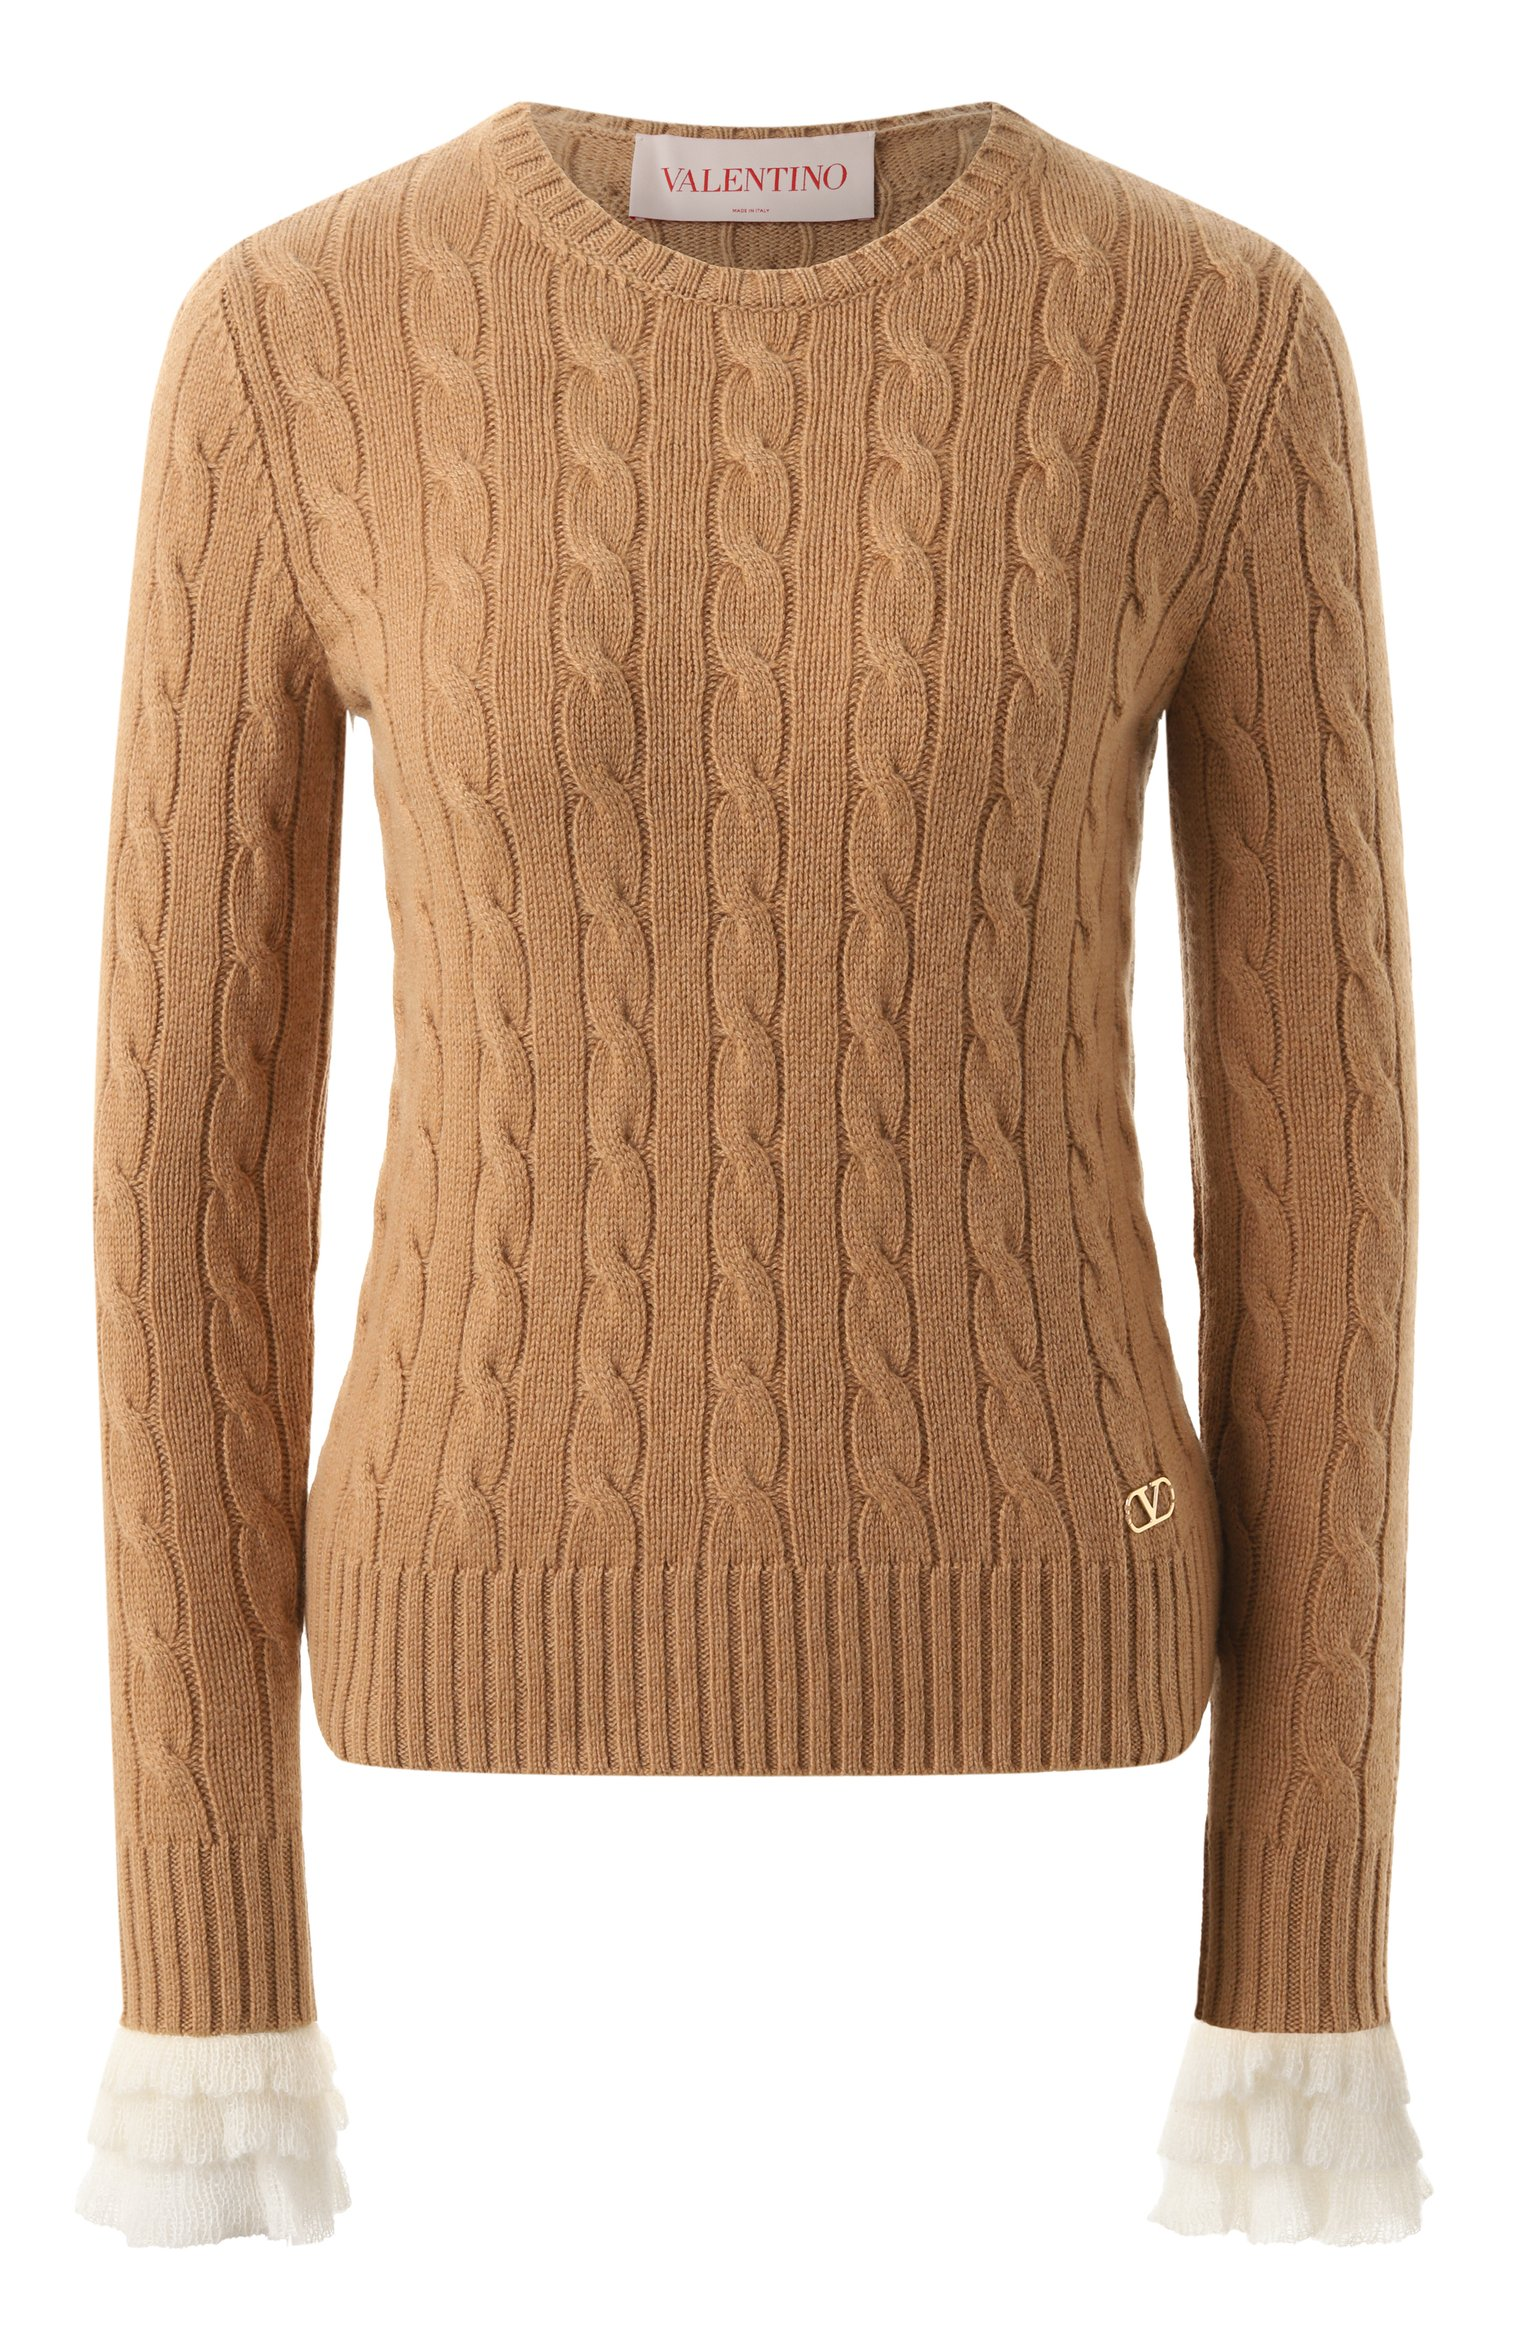
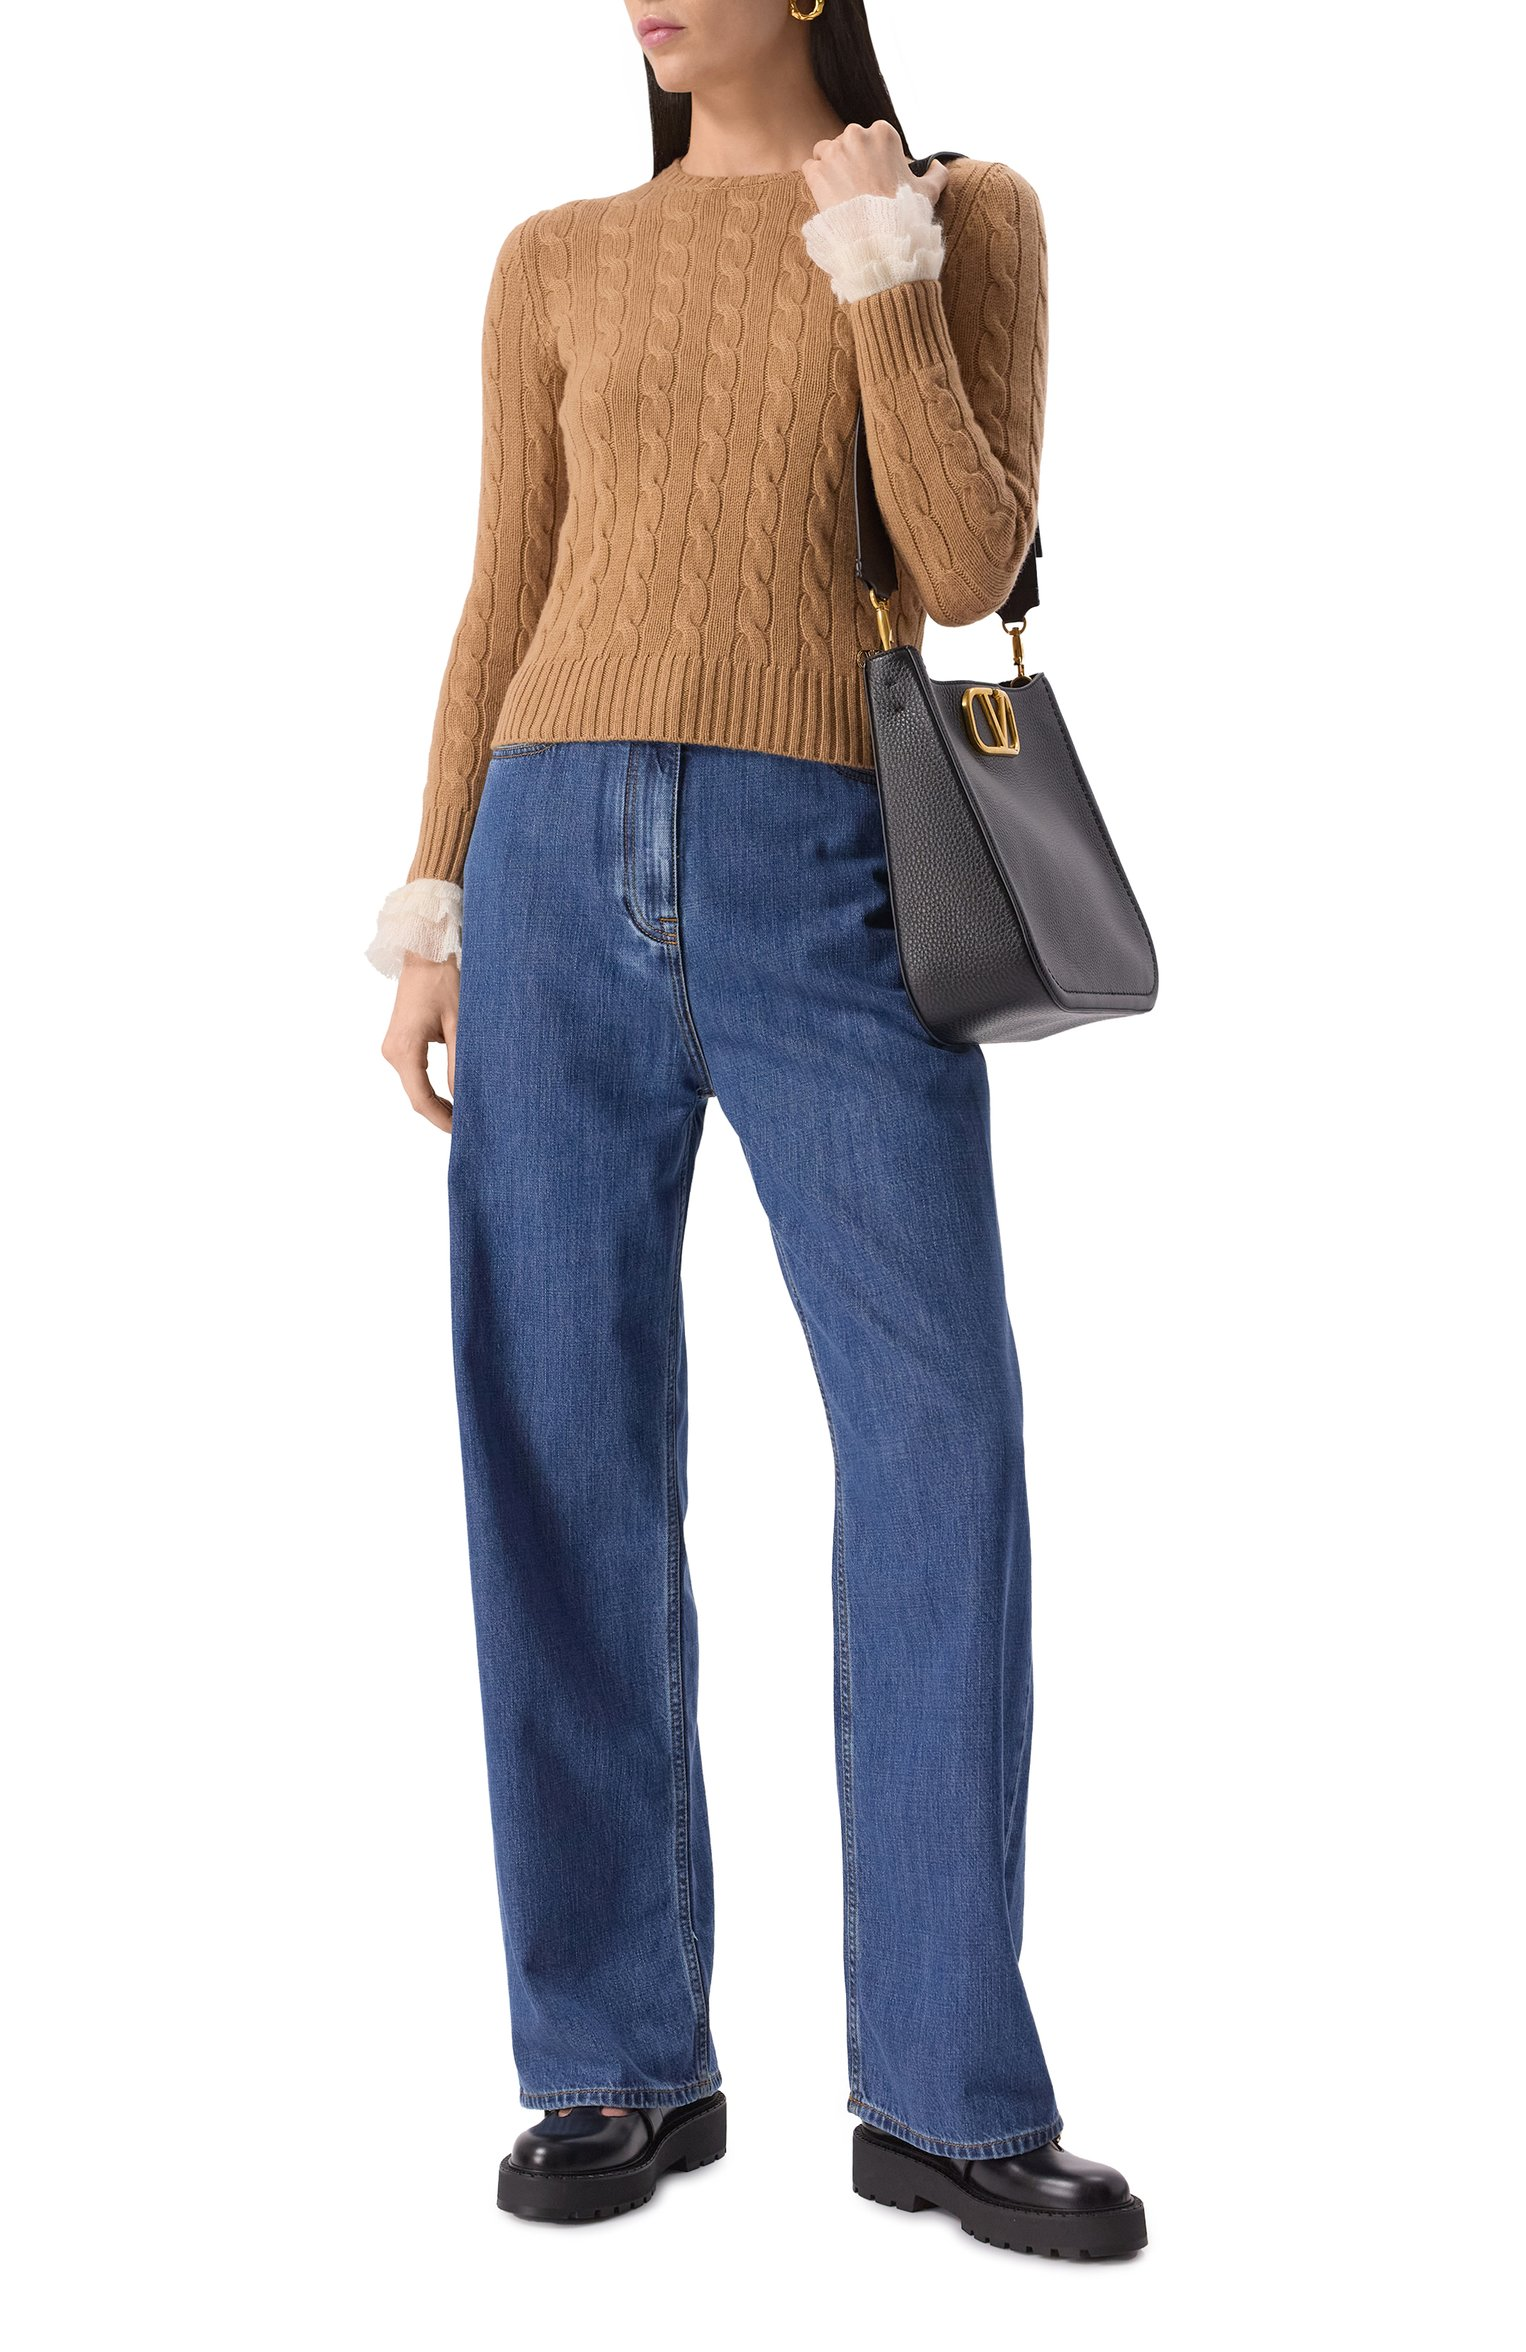
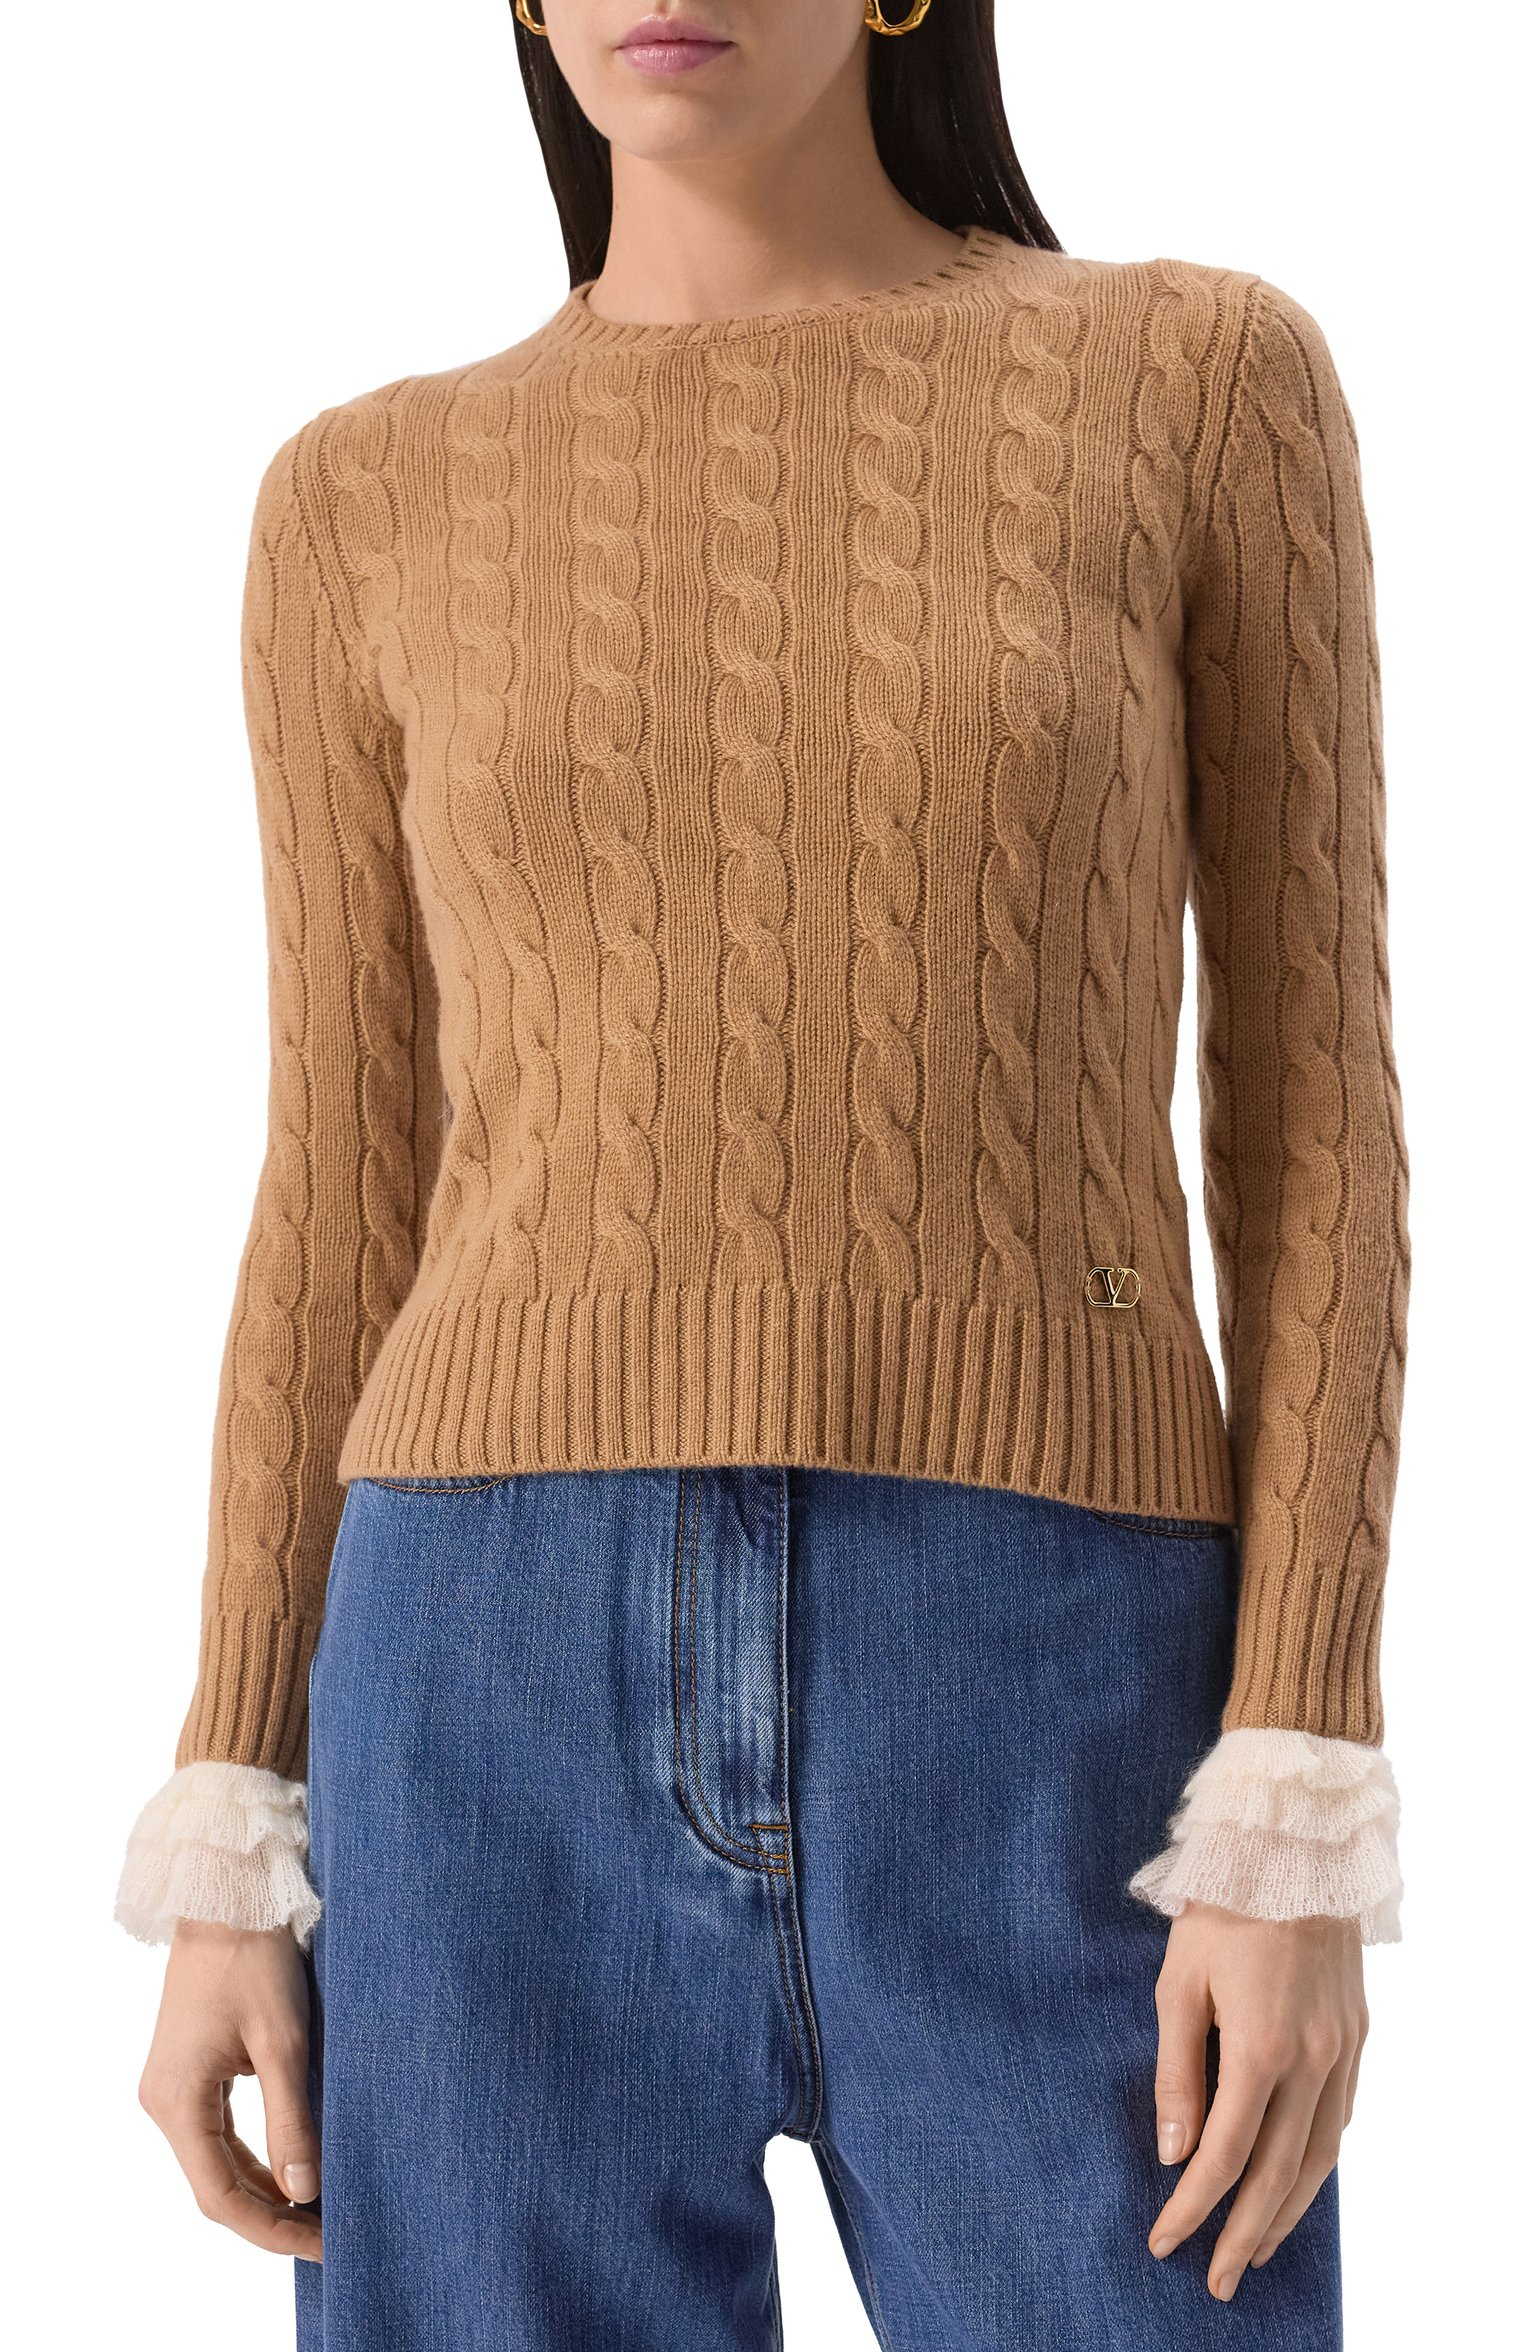
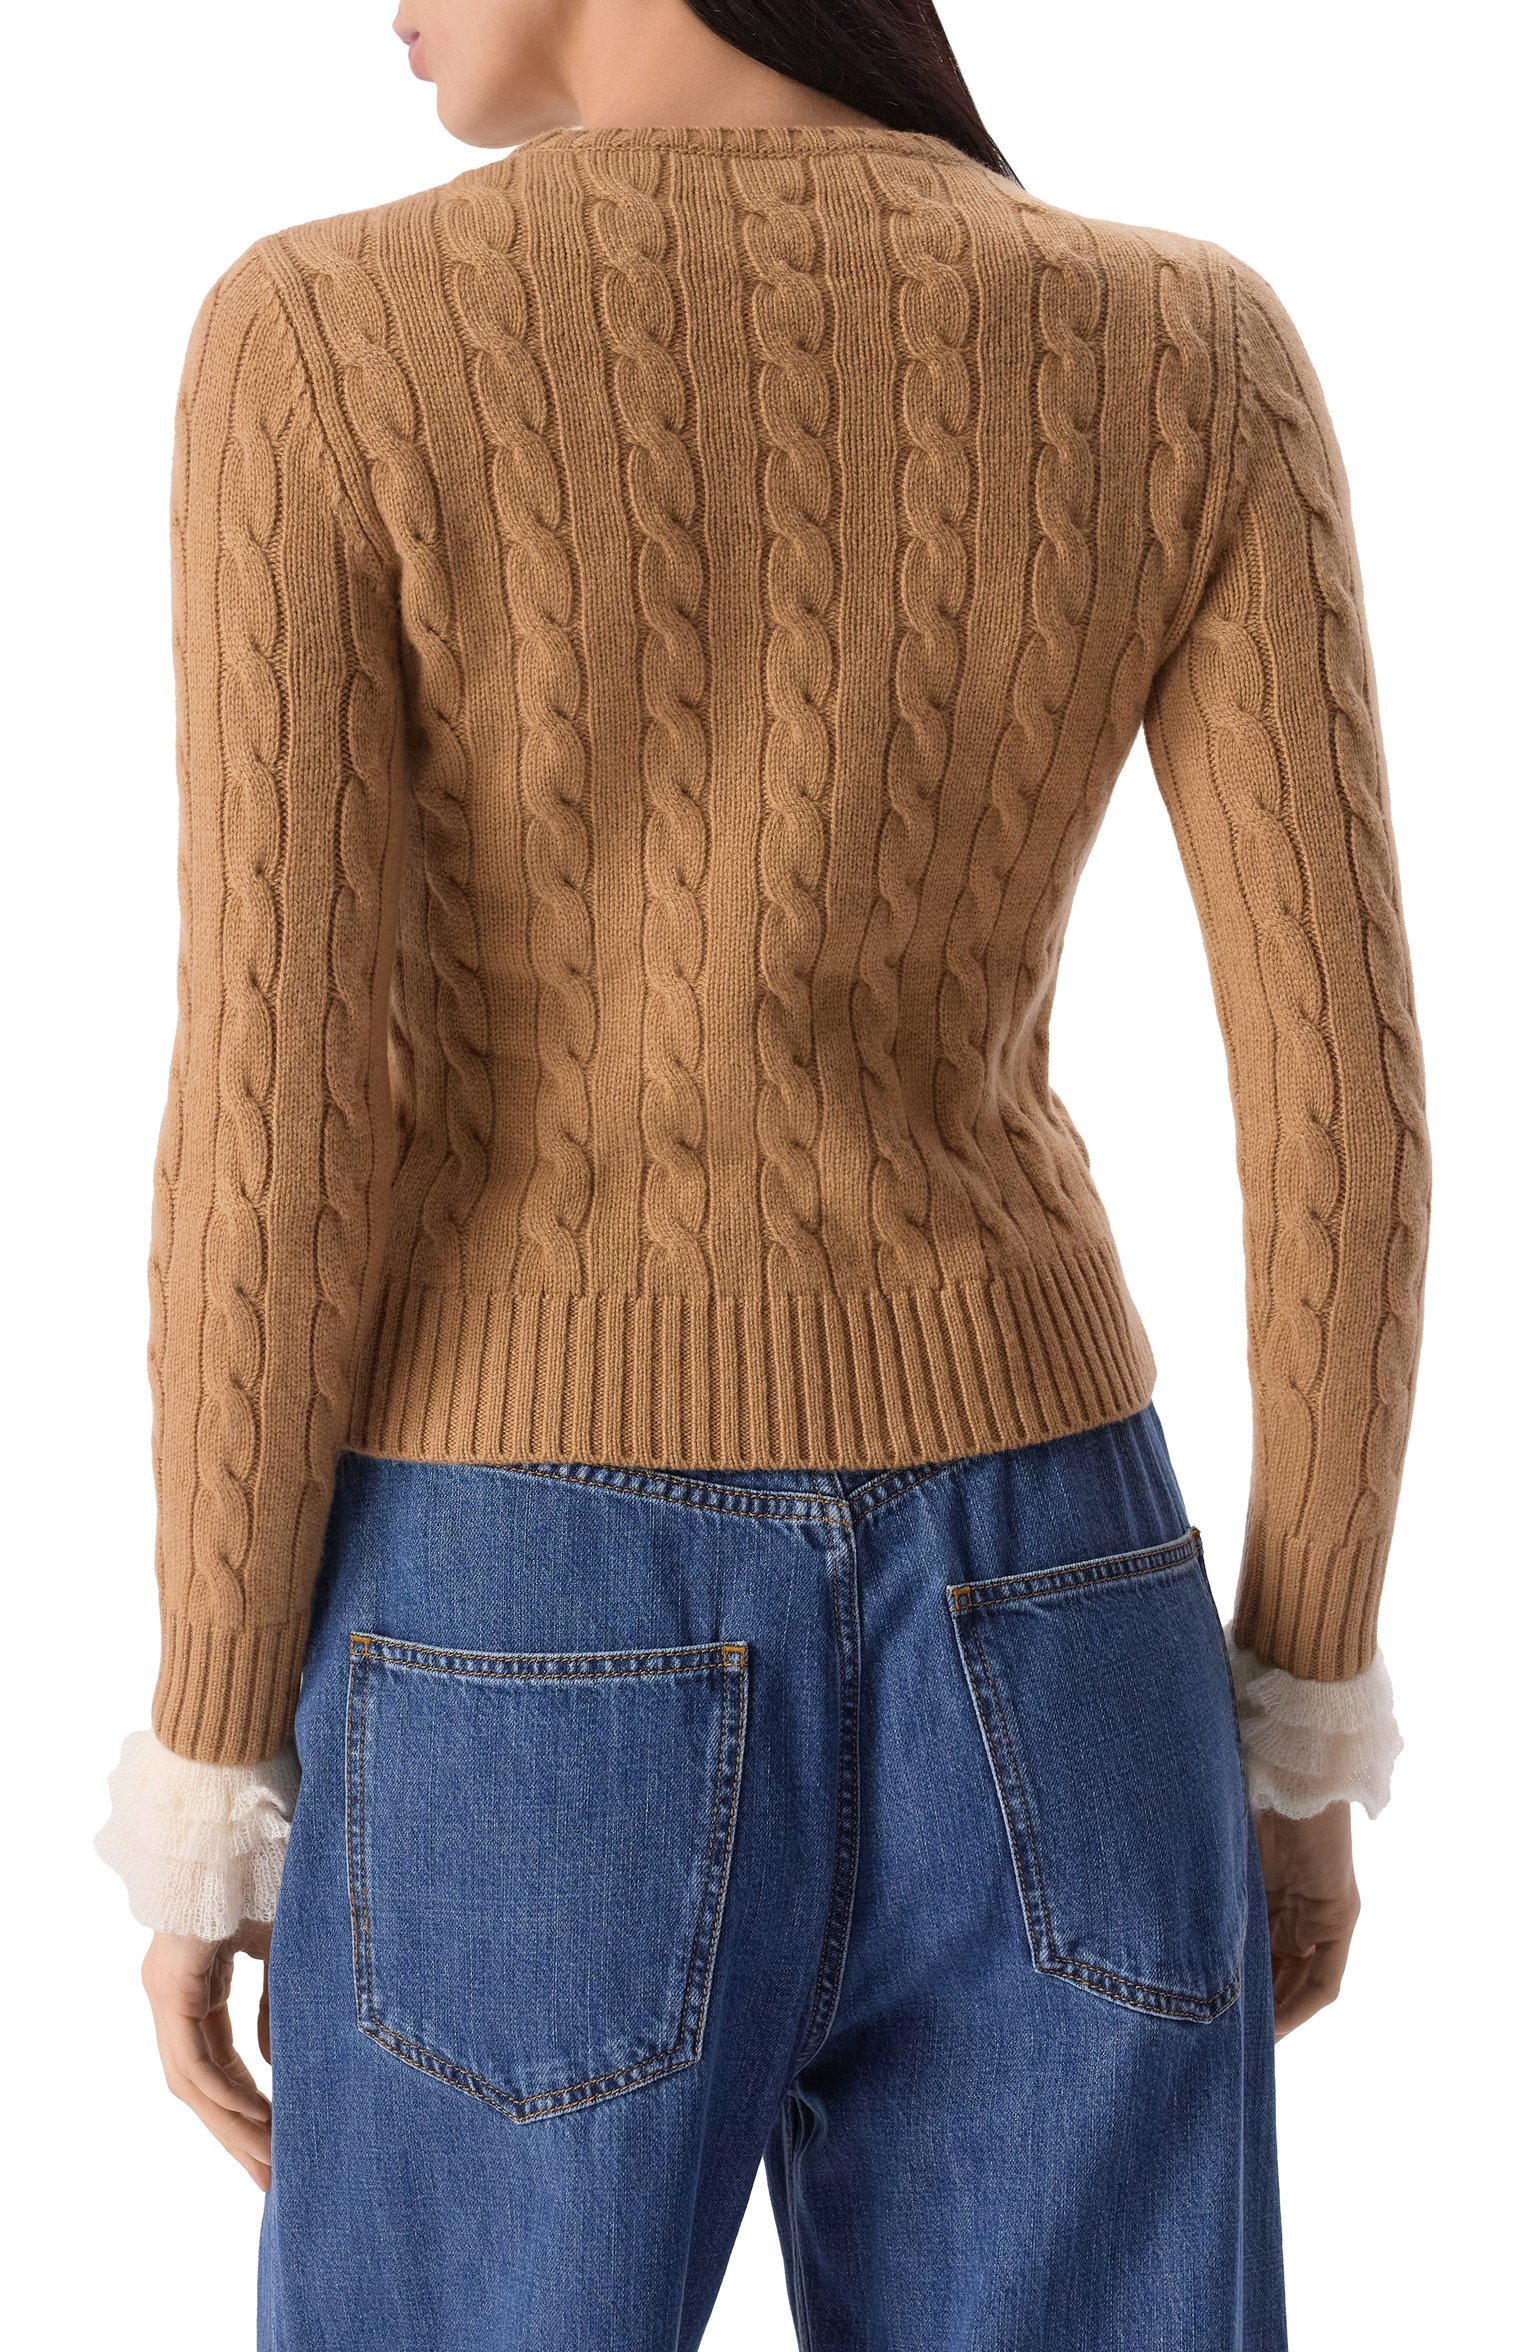
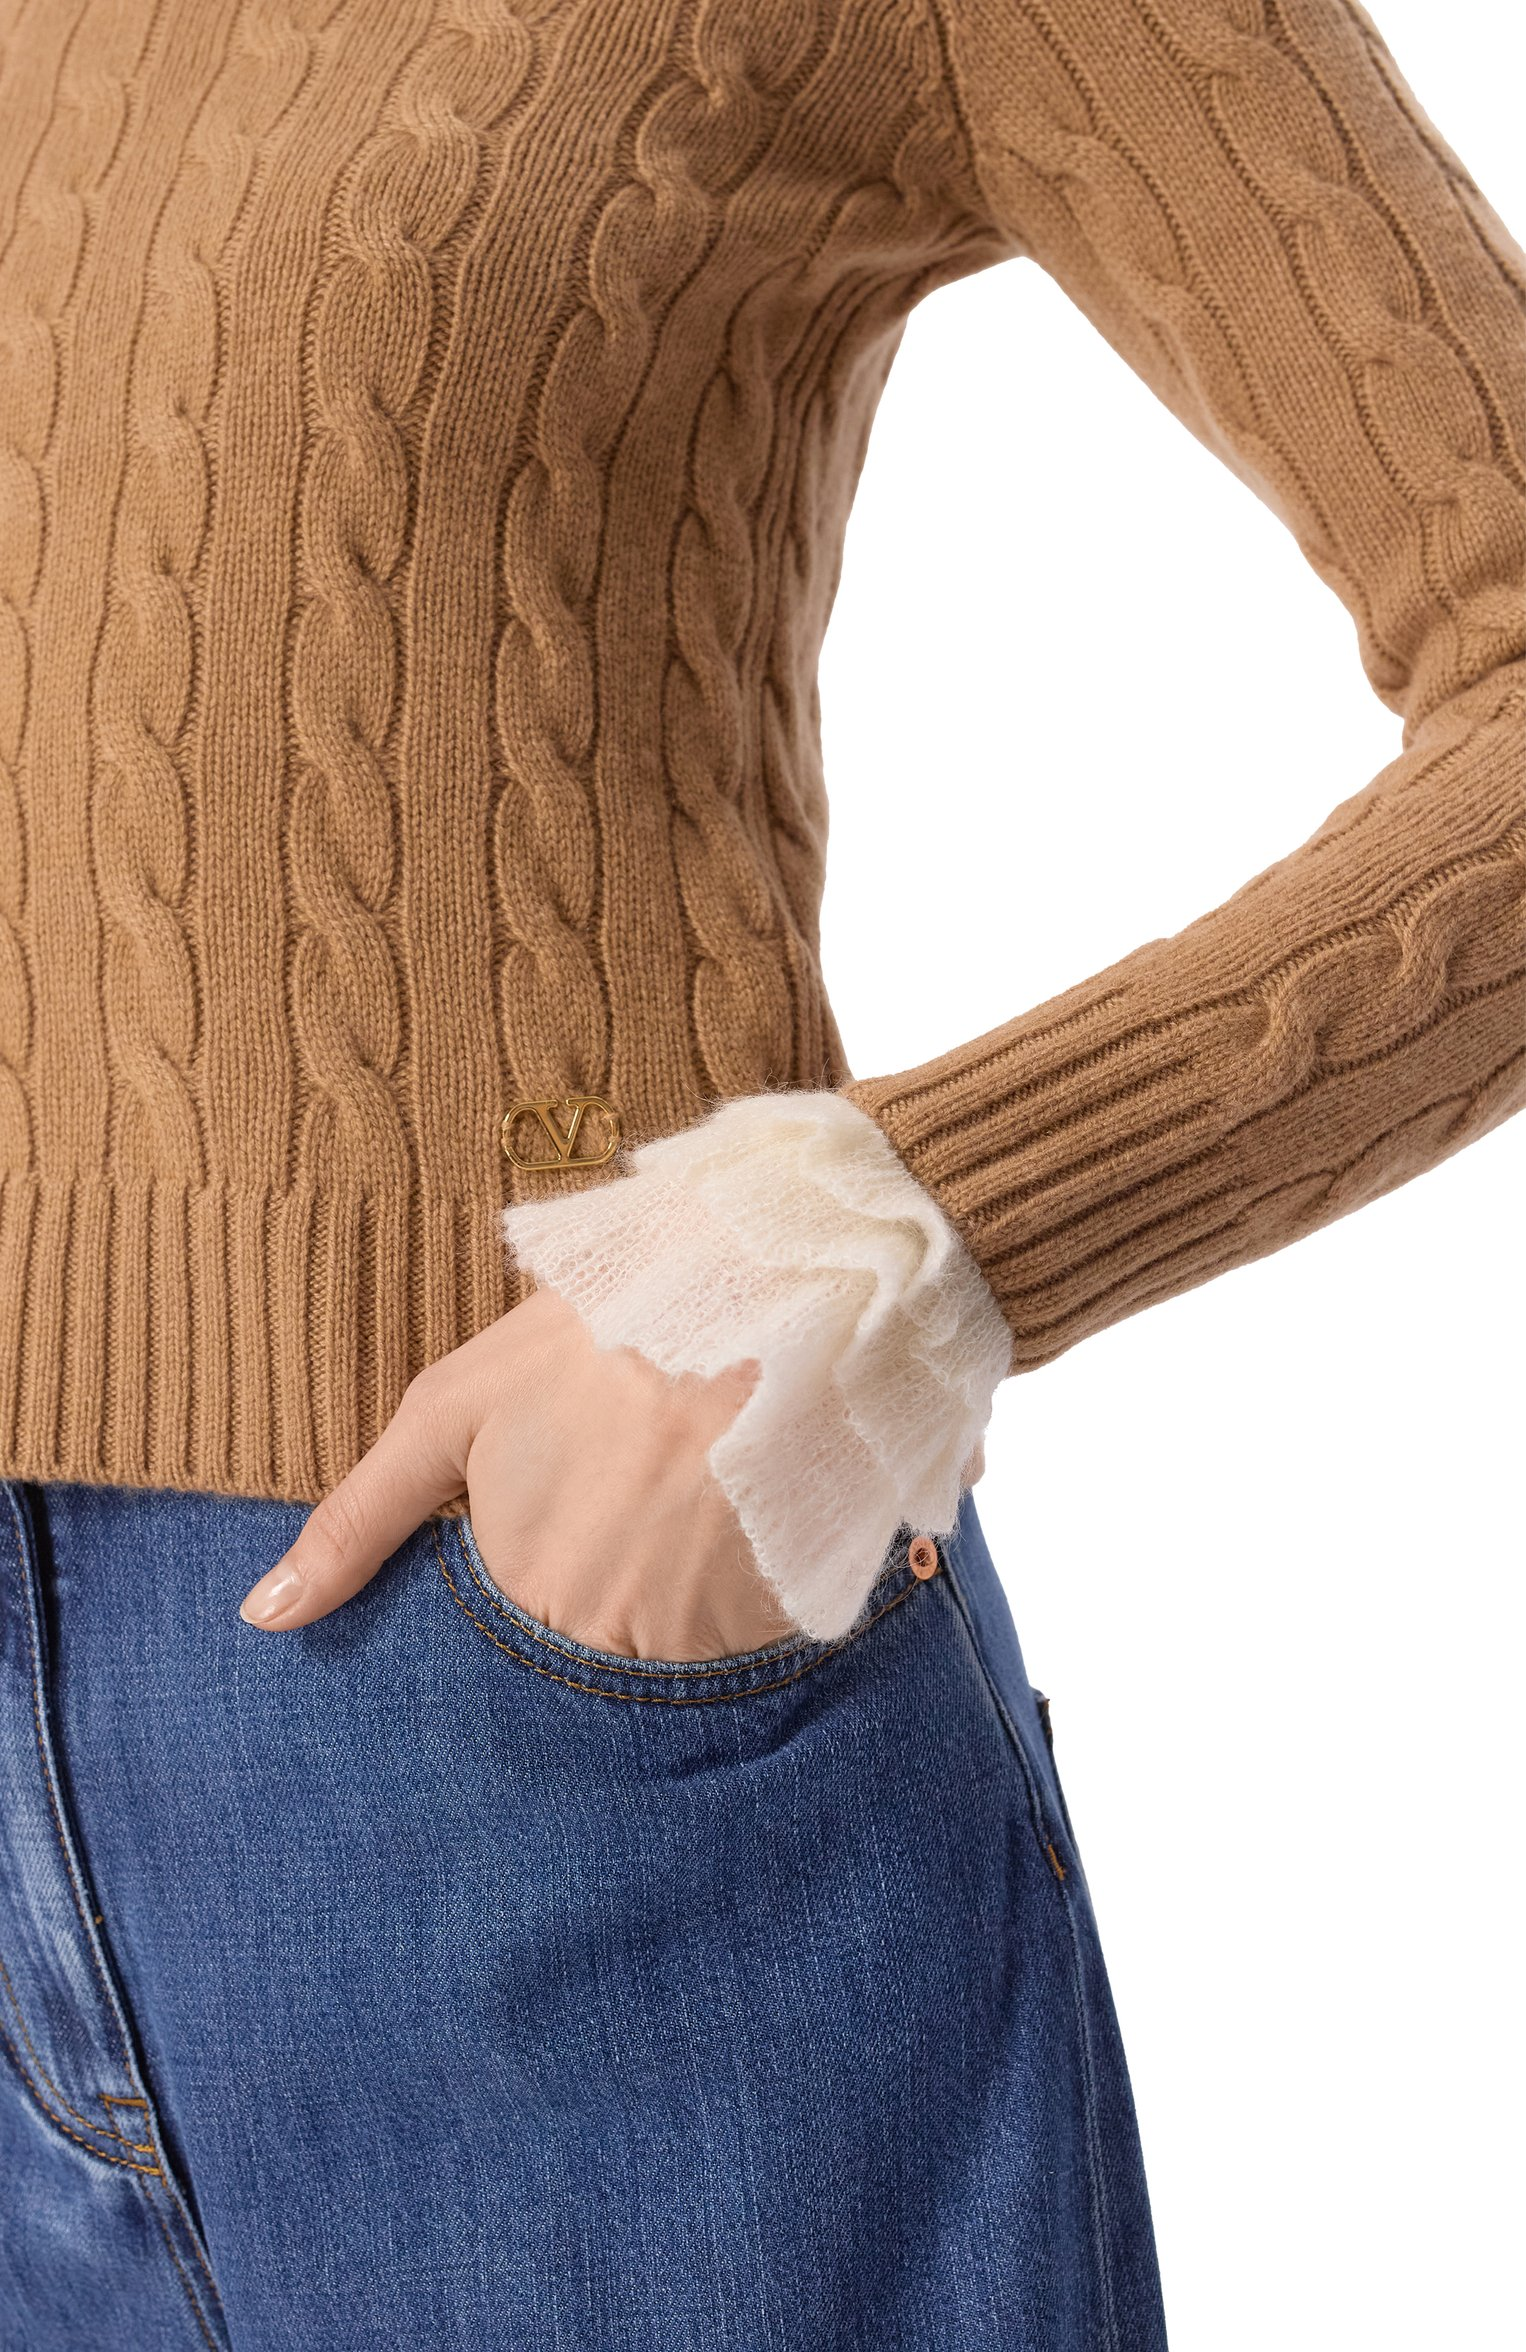
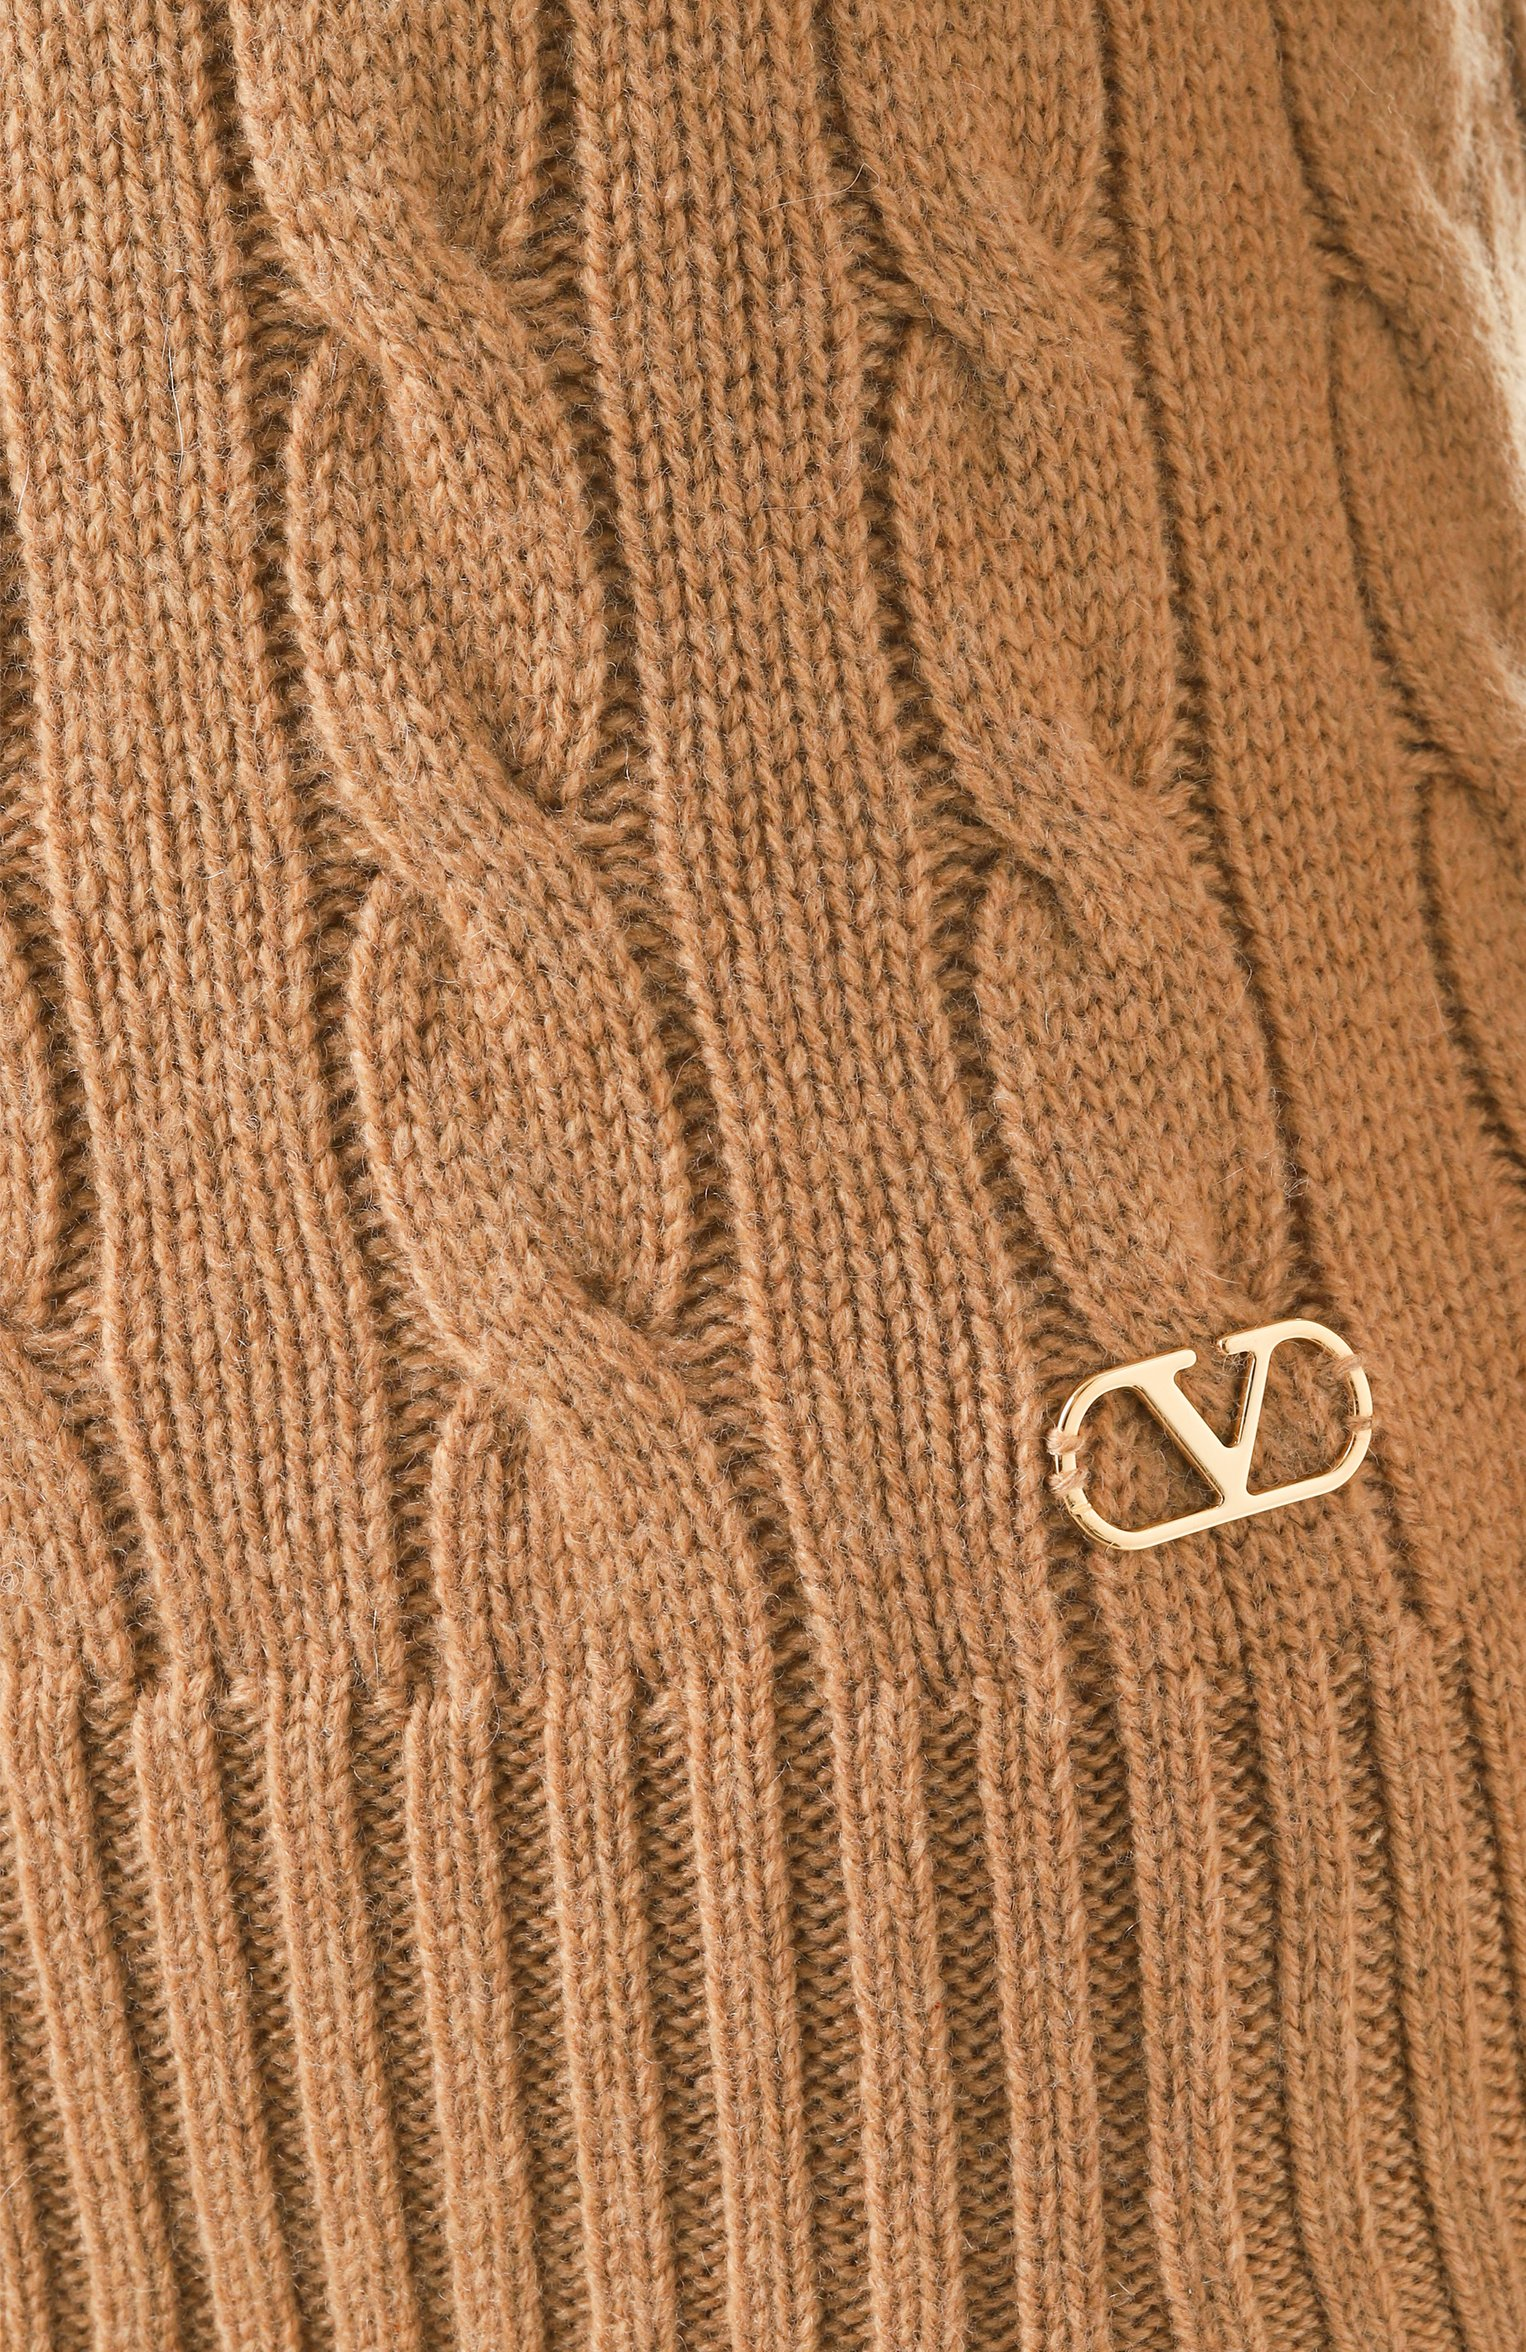

In [181]:
from PIL import Image
import base64
from io import BytesIO
from IPython.display import display  # Для отображения изображений в Jupyter Notebook

def get_image_resolution(base64_str):
    image_data = base64.b64decode(base64_str)
    img = Image.open(BytesIO(image_data))
    return img.size  # Возвращает кортеж (width, height)

from IPython.display import HTML

html_output = ""
for i in range(len(df_main['images_base64_list'].loc[0])):
    base64_str = df_main['images_base64_list'].loc[0][i]
    width, height = get_image_resolution(base64_str)
    html_output += f'<div style="display:inline-block; margin:10px;"><p>Photo {i+1}: {width}x{height}</p><img src="data:image/jpeg;base64,{base64_str}" style="max-width:200px;"></div>'

display(HTML(html_output))


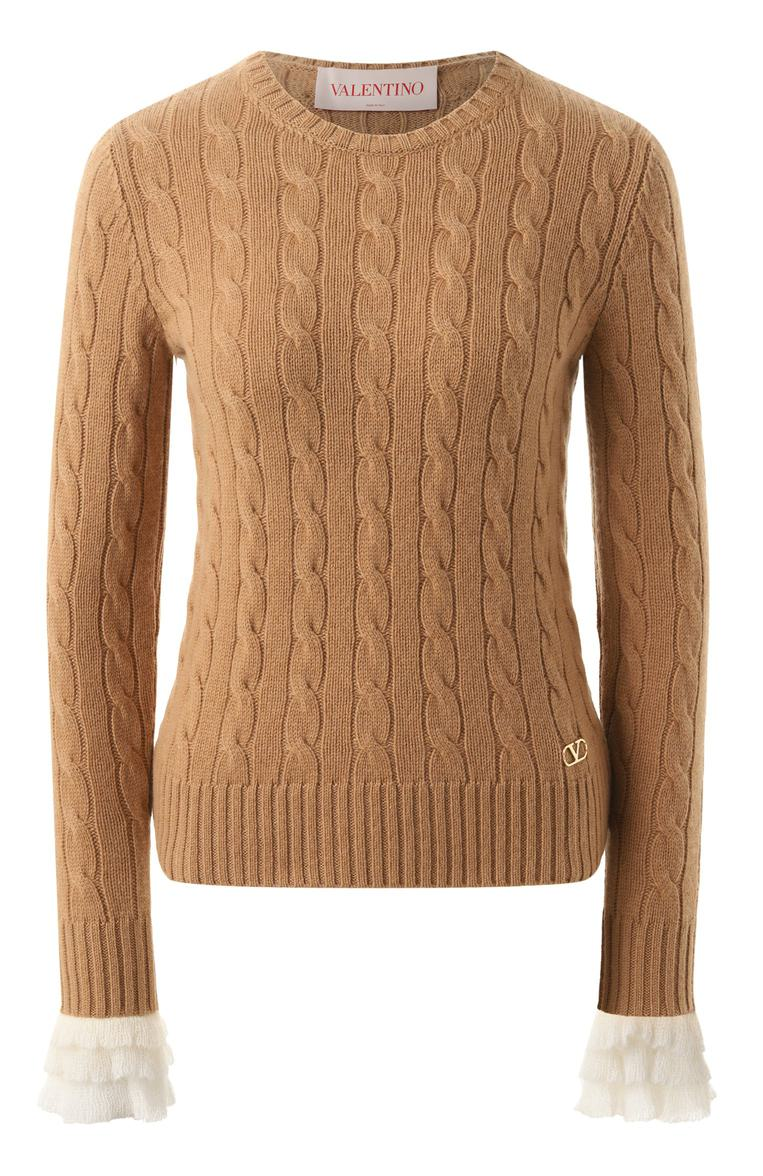
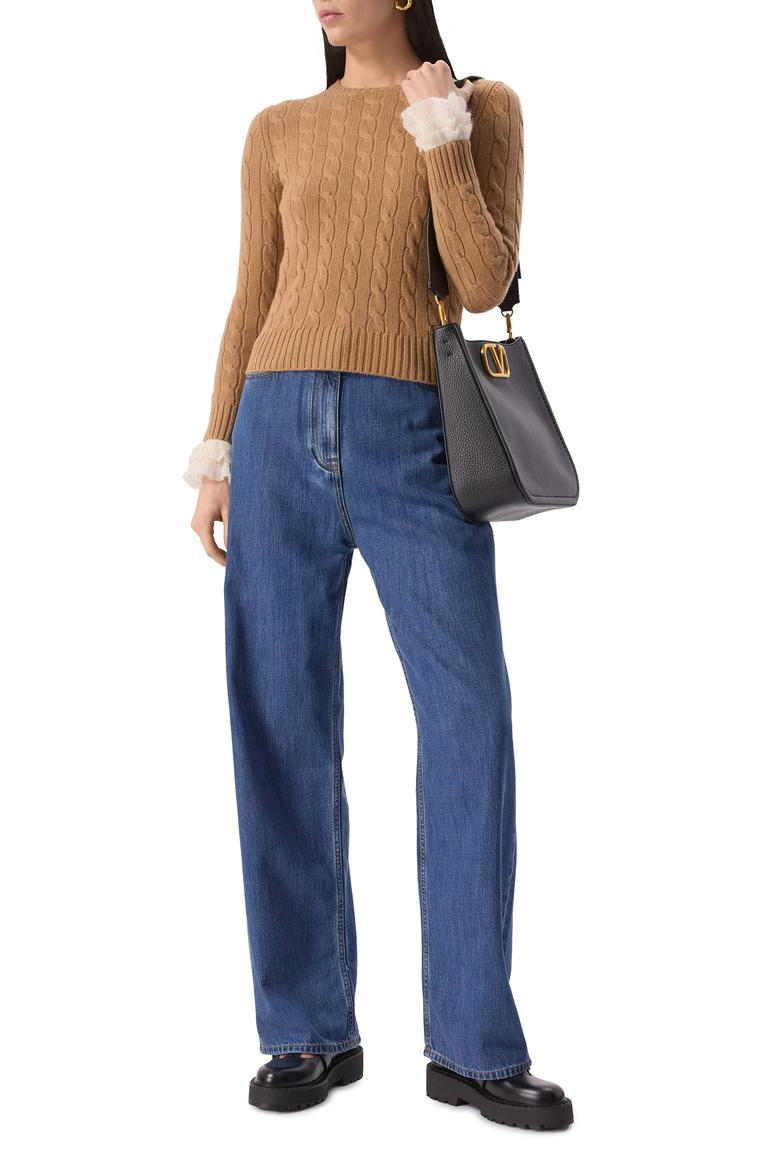
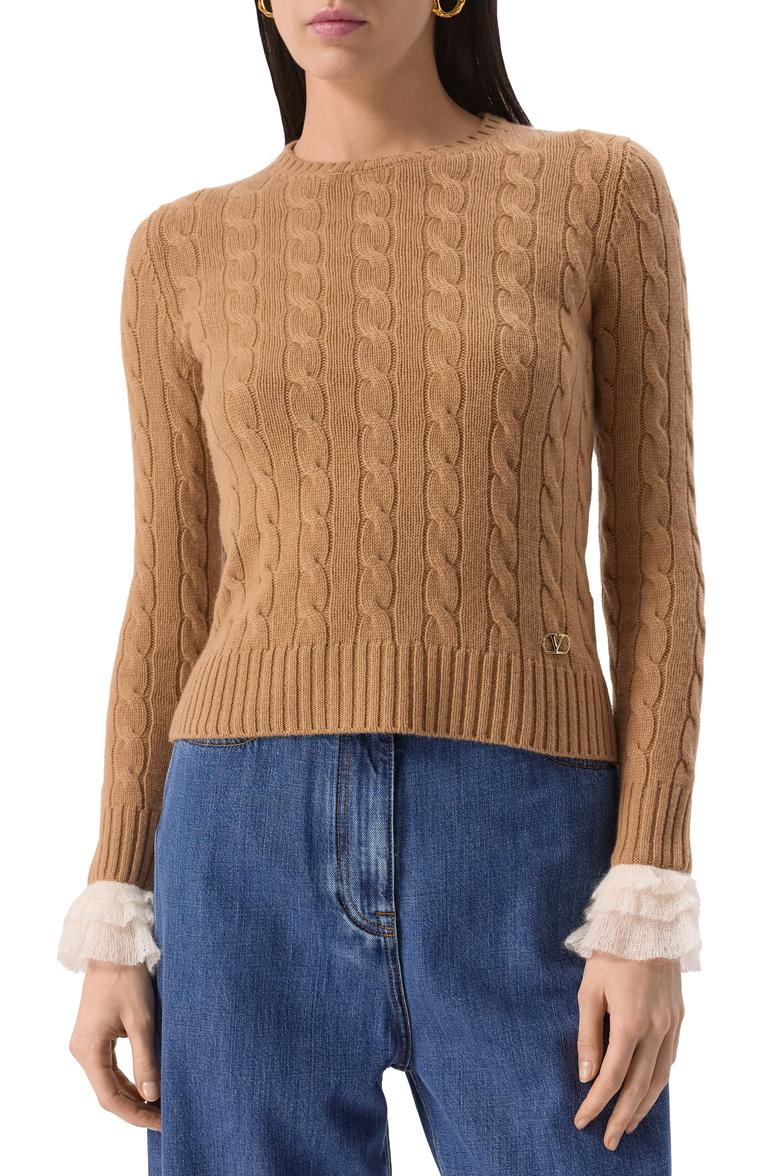
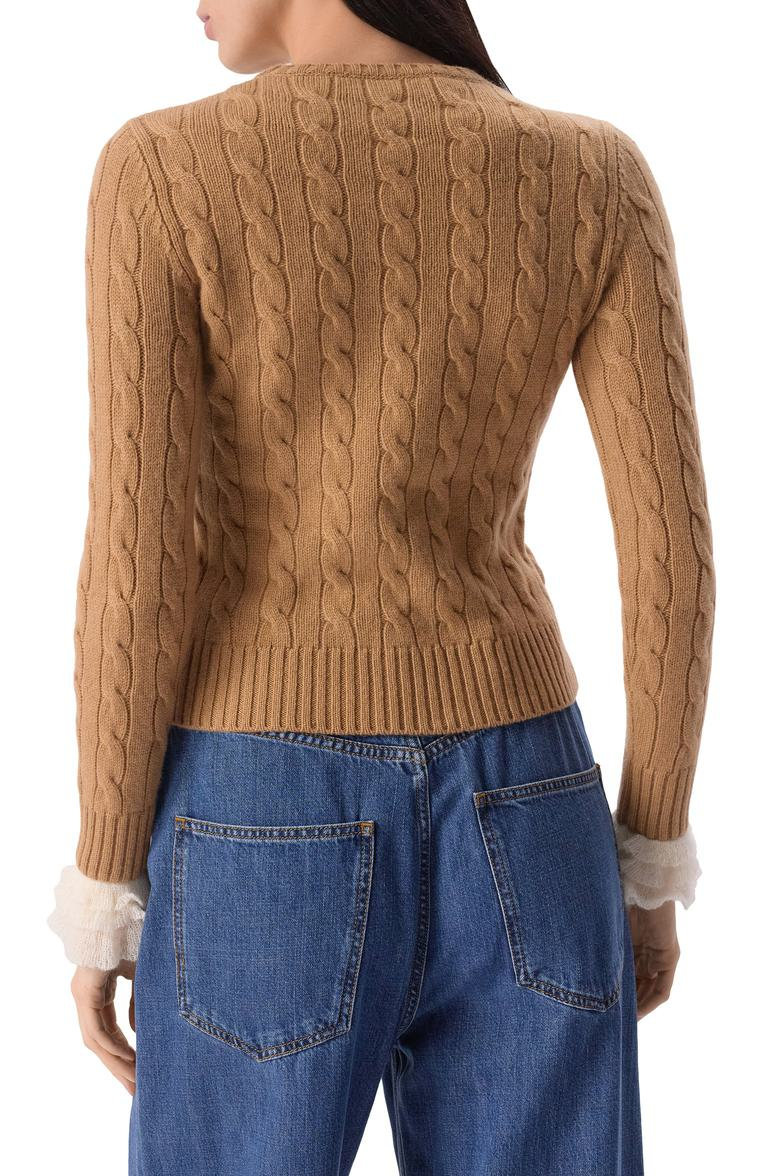
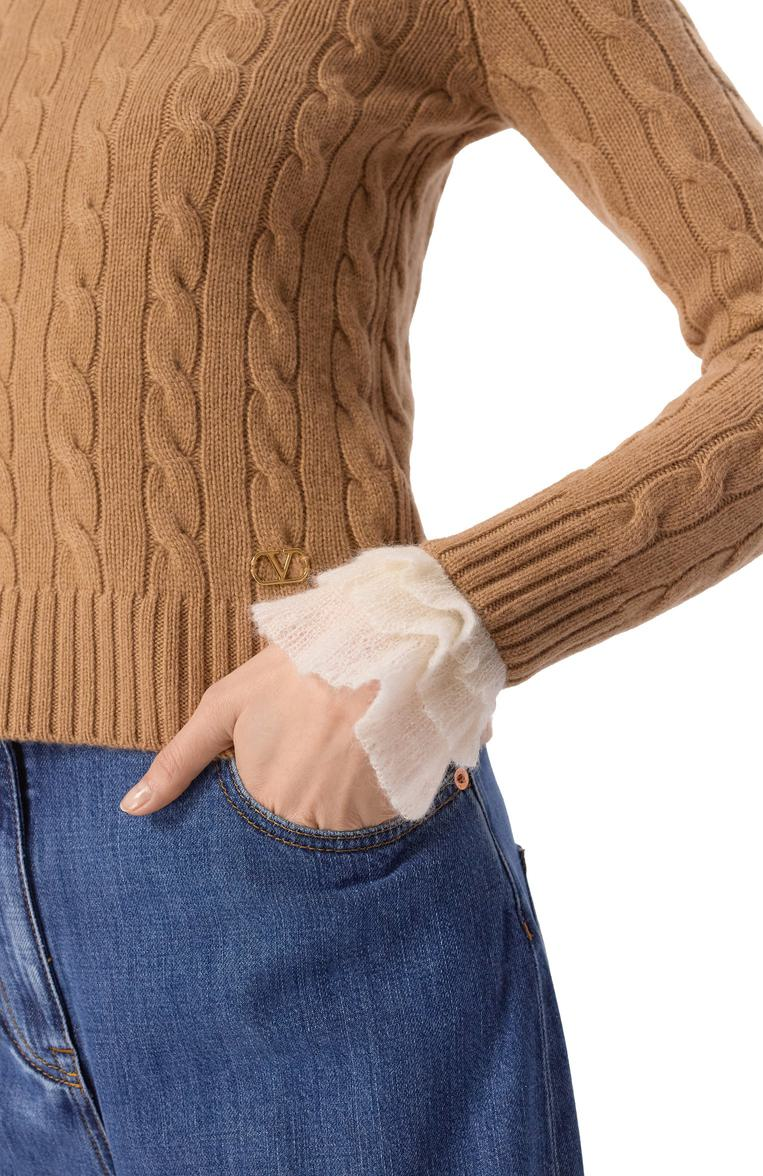
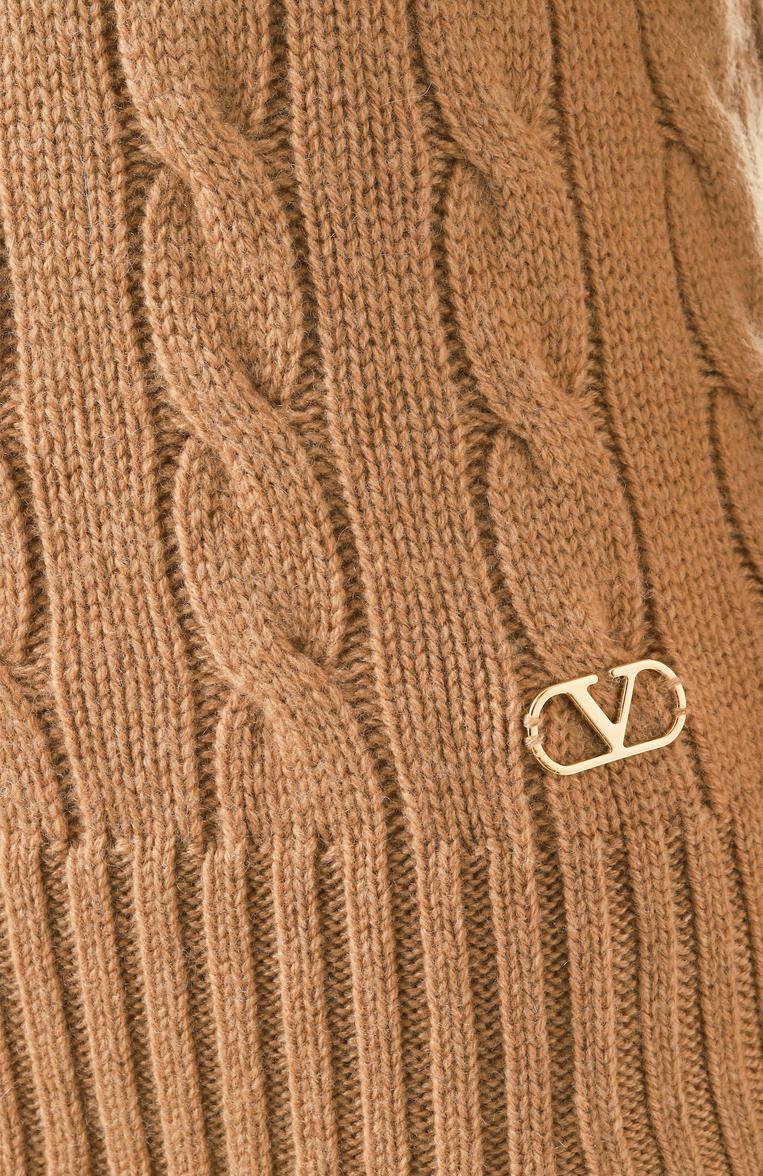

In [53]:
html_output = ""
for i in range(len(df_main['images_base64_list_low'].loc[0])):
    base64_str = df_main['images_base64_list_low'].loc[0][i]
    width, height = get_image_resolution(base64_str)
    html_output += f'<div style="display:inline-block; margin:10px;"><p>Photo {i+1}: {width}x{height}</p><img src="data:image/jpeg;base64,{base64_str}" style="max-width:200px;"></div>'

display(HTML(html_output))


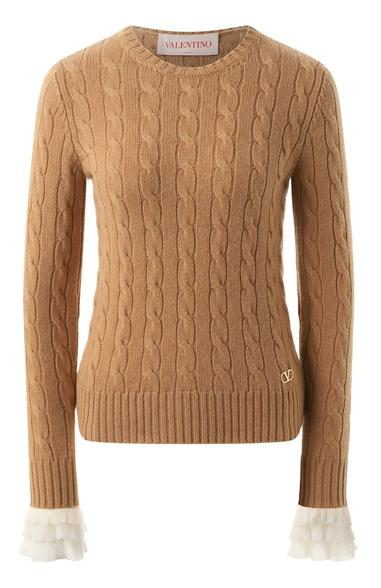
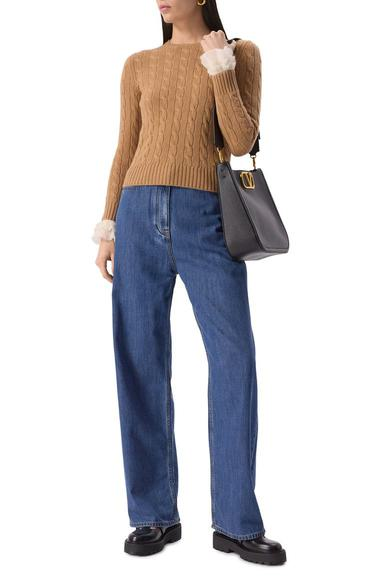
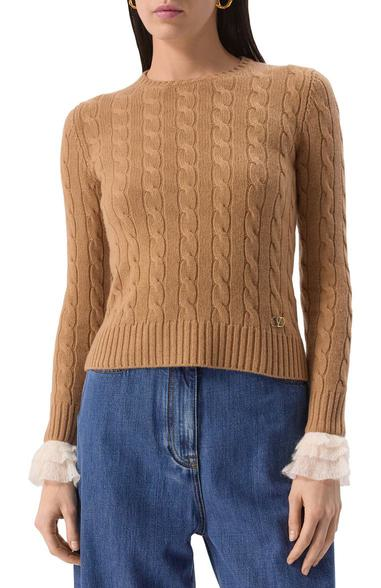
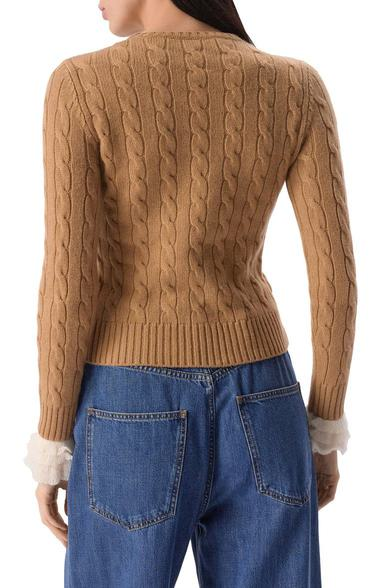
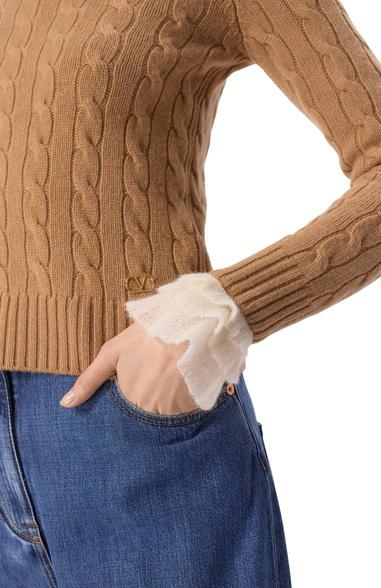
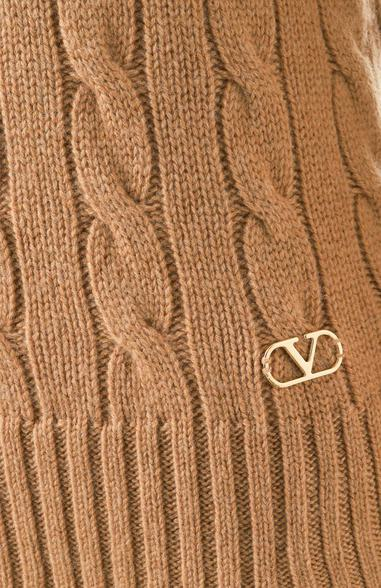

In [54]:
html_output = ""
for i in range(len(df_main['images_base64_list_lowest'].loc[0])):
    base64_str = df_main['images_base64_list_lowest'].loc[0][i]
    width, height = get_image_resolution(base64_str)
    html_output += f'<div style="display:inline-block; margin:10px;"><p>Photo {i+1}: {width}x{height}</p><img src="data:image/jpeg;base64,{base64_str}" style="max-width:200px;"></div>'

display(HTML(html_output))

### Prompt tuning (сюда смотреть не надо)

Подготовь подробное описание по комплексной системе признаков на основе фотографий. Ответ должен быть оформлен в следующем формате:
1.	Базовые визуальные характеристики: 
a.	Цвет (Основной цвет, Дополнительные цвета, Цветовая гамма (теплая/холодная), Паттерны и принты);
b.	Форма и силуэт (Основные линии (прямые, изогнутые), Объем (облегающий, свободный), Длина, Пропорции);
c.	Фактура (Тип материала, Текстура поверхности, Плотность, Прозрачность).
2.	Конструкторские элементы (опирайся на тип товара, распиши подробно).
3.	Стилистические параметры (Стилевое направление (классика, casual, авангард и т.д.), Уровень формальности, Сезонность, Occasion (повод для использования), Сочетаемость с другими стилями).
4.	Контекстные данные (Целевая аудитория, Возрастная группа, Ситуации использования, Рекомендуемые комбинации).
5.	Технические характеристики (Состав материалов, Технологии производства, Уход и эксплуатация, Особенности конструкции).
6.	Маркетинговые параметры (Ценовой сегмент, Позиционирование бренда, Сезон коллекции, Маркетинговая категория).
7.	Поведенческие данные (История просмотров похожих товаров, Статистика совместных покупок, Поисковые запросы пользователей).
8.	Экспертная оценка (Рекомендации стилистов, Оценка универсальности, Сочетаемость с трендами, Уникальные особенности).
Строго соблюдай указанный формат.

Для чего конструкторские элементы:
В прошлом сезоне сделали так, а потом в новом сезоне изменили тип вязки, производитель поменяет код товара, но с точки зрения рексиса это одно и то же, хоть и с разными

Сначала с О1 нужно достать шаблоны для категорий (их всего 4 уровня, подумать, на каком уровне можно остановиться), а потом уже как few shot подставлять в промпты в зависимости от категории SKU.

In [ ]:
len(df_main.iloc[4]['images_base64_list'])

In [231]:
images_base64 = df_main.iloc[4]['images_base64_list']

prompt = f'''
Напиши максимально подробный список конструкторских атрибутов для водолазки.
'''
# openai/gpt-4o-2024-11-20

response_json = generate_description(prompt=prompt, images_base64=None, api_key=api_key, model='openai/o1-preview').json()

In [232]:
print(response_json["choices"][0]["message"]["content"])

Конструкторские атрибуты для водолазки:

1. **Материал**:
   - Хлопок
   - Шерсть
   - Кашемир
   - Шелк
   - Вискоза
   - Лен
   - Бамбук
   - Акрил
   - Полиэстер
   - Нейлон
   - Смесовые ткани (например, хлопок с эластаном)

2. **Состав ткани**:
   - 100% натуральные волокна
   - Смесь натуральных и синтетических волокон
   - Ткань с добавлением эластана или спандекса для эластичности

3. **Тип вязки**:
   - Гладкая вязка
   - Ребристая вязка
   - Крупная вязка
   - Меланжевая вязка
   - Ажурная вязка
   - Косы и араны
   - Жаккардовые узоры

4. **Длина изделия**:
   - Стандартная длина до бедер
   - Удлиненная водолазка
   - Короткая (кроп-топ)
   - Туника

5. **Длина рукава**:
   - Длинный рукав
   - Рукав 3/4
   - Короткий рукав
   - Без рукавов

6. **Фасон**:
   - Облегающий (slim fit)
   - Прямой крой
   - Свободный (oversize)
   - Приталенный
   - А-силуэт
   - Асимметричный крой

7. **Тип воротника**:
   - Классический высокий воротник
   - Воротник средней высоты
   - Низки

In [167]:
url = "https://openrouter.ai/api/v1/auth/key"
headers = {
    "Authorization": f"Bearer {api_key}"
}
response = requests.get(url, headers=headers)
print(f'Использовано ДО запуска: {response.json()['data']['usage']}')

Использовано ДО запуска: 14.18599


In [129]:
df_main['prompt'] = None
df_main['description'] = None
df_main['response_json'] = None
df_main['approximate_cost'] = None
df_main['start_time'] = None
df_main['end_time'] = None

print(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

for index, row in tqdm(df_main.iloc[4].iterrows(), total=df_main.iloc[4].shape[0]):
    
    df_main.at[index, 'start_time'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    
    images_base64 = row['images_base64_list']

    prompt = f'''
Подготовь подробное описание по комплексной системе признаков на основе фотографий. Ответ должен быть оформлен в следующем формате:
1.	Базовые визуальные характеристики: 
a.	Цвет (Основной цвет, Дополнительные цвета, Цветовая гамма (теплая/холодная), Паттерны и принты)
b.	Форма и силуэт (Основные линии (прямые, изогнутые), Объем (облегающий, свободный), Длина, Пропорции)
c.	Фактура (Тип материала, Текстура поверхности, Плотность, Прозрачность)
2.	Конструктивные элементы (Детали кроя, Тип застежек, Наличие карманов, Тип воротника/горловины, Тип рукавов, Декоративные элементы)
3.	Стилистические параметры (Стилевое направление (классика, casual, авангард и т.д.), Уровень формальности, Сезонность, Occasion (повод для использования), Сочетаемость с другими стилями)
4.	Контекстные данные (Целевая аудитория, Возрастная группа, Ситуации использования, Рекомендуемые комбинации)
5.	Технические характеристики (Состав материалов, Технологии производства, Уход и эксплуатация, Особенности конструкции)
6.	Маркетинговые параметры (Ценовой сегмент, Позиционирование бренда, Сезон коллекции, Маркетинговая категория)
7.	Поведенческие данные (История просмотров похожих товаров, Статистика совместных покупок, Поисковые запросы пользователей)
8.	Экспертная оценка (Рекомендации стилистов, Оценка универсальности, Сочетаемость с трендами, Уникальные особенности)
'''
    response_json = generate_description(prompt=prompt, images_base64=images_base64, api_key=api_key, model='openai/gpt-4o-2024-11-20').json()
    description = response_json["choices"][0]["message"]["content"]
    prompt_tokens = response_json['usage']['prompt_tokens']
    completion_tokens = response_json['usage']['completion_tokens']
    total_tokens = response_json['usage']['total_tokens']

    df_main.at[index, 'prompt'] = prompt
    df_main.at[index, 'response_json'] = response_json
    df_main.at[index, 'description'] = description
    df_main.at[index, 'approximate_cost'] = (2.5 * prompt_tokens + 10 * completion_tokens) / 1000000 # USD

    df_main.at[index, 'end_time'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

print(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

2025-01-29 13:52:08


  0%|          | 0/100 [00:00<?, ?it/s]

KeyError: 'choices'

### 1. Базовые визуальные характеристики:  
**a. Цвет:**  
- **Основной цвет:** Светло-оливковый (приглушенный зеленый).  
- **Дополнительные цвета:** Золотистый (пуговицы).  
- **Цветовая гамма:** Теплая, с нейтральным подтоном.  
- **Паттерны и принты:** Однотонный фон с текстурированными вертикальными полосами (рыбья кость).  

**b. Форма и силуэт:**  
- **Основные линии:** Прямые и мягко изогнутые, подчеркивают силуэт фигуры.  
- **Объем:** Облегающий крой.  
- **Длина:** До уровня бедер.  
- **Пропорции:** Подчеркивает верхнюю часть фигуры, визуально делает плечи более выраженными.  

**c. Фактура:**  
- **Тип материала:** Трикотажное полотно.  
- **Текстура поверхности:** Рельефная, упругая, с подчеркнутой горизонтально-вертикальной вязкой.  
- **Плотность:** Высокая, подходит для холодного времени года.  
- **Прозрачность:** Непрозрачный.  

---

### 2. Конструктивные элементы:  
- **Детали кроя:** Классическая плечевая линия с центральной декоративной линией, акцент сделан на пуговицы.  
- **Тип застежек:** Отсутствие застежек; изделие надевается через голову.  
- **Наличие карманов:** Нет.  
- **Тип воротника/горловины:** Высокий воротник (стойка).  
- **Тип рукавов:** Длинные, облегающие.  
- **Декоративные элементы:**  
  - Крупные золотистые пуговицы на плечах (по 3 на каждую сторону).  

---

### 3. Стилистические параметры:  
- **Стилевое направление:** Современная классика с элементами минимализма.  
- **Уровень формальности:** Условно-формальный.  
- **Сезонность:** Осень/зима.  
- **Occasion (повод):** Подходит для офиса, деловых встреч или вечерних мероприятий в сочетании с юбками или брюками.  
- **Сочетаемость с другими стилями:** Легко комбинируется с классическим (карандашные юбки, пиджаки) и casual-гардеробом (джинсы, кожаные аксессуары).  

---

### 4. Контекстные данные:  
- **Целевая аудитория:** Женщины, предпочитающие элегантность и комфорт одновременно.  
- **Возрастная группа:** 25-45 лет.  
- **Ситуации использования:** Работа, вечерние мероприятия, прогулки в прохладную погоду.  
- **Рекомендуемые комбинации:**  
  - Черная юбка с застежками и высокие замшевые сапоги.  
  - Сумка среднего размера с золотистой фурнитурой.  

---

### 5. Технические характеристики:  
- **Состав материалов:** Вероятно, смесь шерсти и синтетического волокна для упругости и тепла.  
- **Технологии производства:** Машинная вязка (трикотаж).  
- **Уход и эксплуатация:**  
  - Рекомендуется ручная стирка или деликатный режим в прохладной воде.  
  - Не отбеливать, сушить в разложенном виде.  
- **Особенности конструкции:** Растяжимость и восстановление формы.  

---

### 6. Маркетинговые параметры:  
- **Ценовой сегмент:** Средний или премиум.  
- **Позиционирование бренда:** Модели для современных женщин, совмещающие практичность и стиль.  
- **Сезон коллекции:** Осень-зима.  
- **Маркетинговая категория:** Повседневный гардероб с элегантным акцентом.  

---

### 7. Поведенческие данные:  
- **История просмотров похожих товаров:** Предпочтение свитеров с акцентом на плечах или воротнике.  
- **Статистика совместных покупок:** Юбки-карандаши, сапоги с высоким голенищем, аксессуары золотых оттенков.  
- **Паттерны замен при возвратах:** Могут заменяться на изделия с большим комфортом в области плечевого кроя.  
- **Поисковые запросы пользователей:** «Свитер с пуговицами», «вязаный свитер с высоким воротником», «теплый облегающий свитер».  

---

### 8. Экспертная оценка:  
- **Рекомендации стилистов:** Удачный выбор для создания базового гардероба; рекомендуется сочетание с теплыми аксессуарами (шарфами, шапками).  
- **Оценка универсальности:** 8/10 – подходит для большого спектра ситуаций, но требует правильного подбора аксессуаров.  
- **Сочетаемость с трендами:** Вписывается в тренды минимализма и акцентов на деталях.  
- **Уникальные особенности:** Декоративные пуговицы привносят элегантный акцент, сложный крой делает изделие уникальным.  

In [192]:
print(df_main.iloc[4]['description'])

### 1. Базовые визуальные характеристики:  
**a. Цвет:**  
- **Основной цвет:** Светло-оливковый (приглушенный зеленый).  
- **Дополнительные цвета:** Золотистый (пуговицы).  
- **Цветовая гамма:** Теплая, с нейтральным подтоном.  
- **Паттерны и принты:** Однотонный фон с текстурированными вертикальными полосами (рыбья кость).  

**b. Форма и силуэт:**  
- **Основные линии:** Прямые и мягко изогнутые, подчеркивают силуэт фигуры.  
- **Объем:** Облегающий крой.  
- **Длина:** До уровня бедер.  
- **Пропорции:** Подчеркивает верхнюю часть фигуры, визуально делает плечи более выраженными.  

**c. Фактура:**  
- **Тип материала:** Трикотажное полотно.  
- **Текстура поверхности:** Рельефная, упругая, с подчеркнутой горизонтально-вертикальной вязкой.  
- **Плотность:** Высокая, подходит для холодного времени года.  
- **Прозрачность:** Непрозрачный.  

---

### 2. Конструктивные элементы:  
- **Детали кроя:** Классическая плечевая линия с центральной декоративной линией, акцент сделан на п

In [131]:
response_json.json()

{'error': {'message': 'This endpoint\'s maximum context length is 128000 tokens. However, you requested about 134403 tokens (1463 of text input, 132940 of image input). Please reduce the length of either one, or use the "middle-out" transform to compress your prompt automatically.',
  'code': 400}}

In [183]:
df_main.head(3)

page product_id  rownum                                               url2  \
0     1    7010551       1  https://www.tsum.ru/product/7010551-zhaket-iz-...   
1     1    7010546       2  https://www.tsum.ru/product/7010546-tvidovye-s...   
2     1    7017817       3  https://www.tsum.ru/product/7017817-sumka-eva-...   

                                  images_base64_list  \
0  [/9j/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtb...   
1  [/9j/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtb...   
2  [/9j/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtb...   

                                              prompt  \
0  \nПодготовь подробное описание по комплексной ...   
1  \nПодготовь подробное описание по комплексной ...   
2  \nПодготовь подробное описание по комплексной ...   

                                         description  \
0  ### 1. Базовые визуальные характеристики:\n###...   
1  ### 1. Базовые визуальные характеристики:\na. ...   
2  ### 1. Базовые визуальные характеристики:\n**a...   

                                       response_json approximate_cost  \
0  {'id': 'gen-1738147928-sJiBEKaa4U4WNYItSzoL', ...         0.014122   
1  {'id': 'gen-1738147963-wWP6J3EqLmDEEb1v6ang', ...         0.017988   
2  {'id': 'gen-1738148000-78JGKffuArti400YzK5N', ...         0.015998   

            start_time             end_time  
0  2025-01-29 13:52:08  2025-01-29 13:52:43  
1  2025-01-29 13:52:43  2025-01-29 13:53:21  
2  2025-01-29 13:53:21  2025-01-29 13:53:53

In [184]:
df_main.head(91).to_excel('test_output.xlsx', index=False)

In [149]:
np.mean(pd.to_datetime(df_main['end_time']) - pd.to_datetime(df_main['start_time']))

Timedelta('0 days 00:00:30.362637362')

In [155]:
df_main['images_base64_list'].apply(len).mean(), df_main['images_base64_list'].apply(len).median()

(11.87, 7.0)

In [156]:
df_main['images_base64_list'].apply(
    lambda lst: sum(map(len, lst)) / len(lst) if lst else 0
).mean()

31686.692844379504

In [160]:
url = "https://openrouter.ai/api/v1/auth/key"
headers = {
    "Authorization": f"Bearer {api_key}"
}
response = requests.get(url, headers=headers)
print(f'Использовано ПОСЛЕ запуска: {response.json()['data']['usage']}')

Использовано ПОСЛЕ запуска: 2.198435


In [152]:
(2.198435 - 0.2131125) / 91, 2.198435 - 0.2131125

(0.02181673076923077, 1.9853224999999999)

In [173]:
img = 'photo_1.jpg'
img_64 = encode_image(img)
img_64_lst = [img_64] * 10

In [174]:
len(img_64)

10028508

In [175]:
res = generate_description(prompt=prompt, images_base64=img_64_lst, api_key=api_key, model='openai/gpt-4o-2024-11-20')

In [176]:
url = "https://openrouter.ai/api/v1/auth/key"
headers = {
    "Authorization": f"Bearer {api_key}"
}
response = requests.get(url, headers=headers)
print(f'Использовано ПОСЛЕ запуска: {response.json()['data']['usage']}')

Использовано ПОСЛЕ запуска: 2.2754725


In [178]:
2.2754725-2.2325

0.04297249999999986

In [177]:
res.json()["choices"][0]["message"]["content"]

'**1. Базовые визуальные характеристики:**  \na. **Цвет:**  \n   - Основной цвет: Бежевый.  \n   - Дополнительные цвета: Белый (манжеты).  \n   - Цветовая гамма: Теплая.  \n   - Паттерны и принты: Рельефный узор, тип "косы".  \n\nb. **Форма и силуэт:**  \n   - Основные линии: Плавные, округлые.  \n   - Объем: Прилегающий силуэт, средней плотности.  \n   - Длина: Уровень чуть ниже талии.  \n   - Пропорции: Соблюдён баланс между длиной тела и рукавов, акцент на гармоничное облегание.  \n\nc. **Фактура:**  \n   - Тип материала: Трикотажная вязка.  \n   - Текстура поверхности: Мягкая, рельефная.  \n   - Плотность: Средняя.  \n   - Прозрачность: Полностью непрозрачный.  \n\n---\n\n**2. Конструктивные элементы:**  \n- **Детали кроя:** Прямой крой с объемным вязаным узором в виде крупных "кос".  \n- **Тип застежек:** Отсутствуют.  \n- **Наличие карманов:** Карманы отсутствуют.  \n- **Тип воротника/горловины:** Круглый ворот без дополнительных деталей.  \n- **Тип рукавов:** Длинные рукава, доп

### 1. Базовые визуальные характеристики:
**a. Цвет:**
- Основной цвет: Карамельный (бежевый теплого оттенка).
- Дополнительные цвета: Белый акцент на манжетах.
- Цветовая гамма: Теплая.
- Паттерны и принты: Классический вязанный узор с косами.

**b. Форма и силуэт:**
- Основные линии: Преобладают прямые и слегка изогнутые линии (узор косички).
- Объем: Облегающий, близкий к телу силуэт.
- Длина: Стандартная длина до линии бедер.
- Пропорции: Горизонтальные элементы вязки создают мягкий визуальный ритм.

**c. Фактура:**
- Тип материала: Шерсть (вероятно кашемир/меринос или их смесь).
- Текстура поверхности: Вязаная, объемная.
- Плотность: Средней плотности, непрозрачная структура.
- Прозрачность: Полностью непрозрачный.

---

### 2. Конструктивные элементы:
- Детали кроя: Классический трикотажный крой без швов вдоль центральной линии.
- Тип застежек: Отсутствуют.
- Наличие карманов: Не предусмотрены.
- Тип воротника/горловины: Круглая горловина, без дополнительных акцентов.
- Тип рукавов: Длинные рукава с уникальным декоративным элементом – белые шерстяные кисточки на манжетах.
- Декоративные элементы: Логотип бренда в виде металлической вставки (золотистый), контрастный акцент на манжетах.

---

### 3. Стилистические параметры:
- Стилевое направление: Современная классика с элементами романтики.
- Уровень формальности: Средний (уместен как в повседневной, так и в полуформальной обстановке).
- Сезонность: Осень-зима.
- Occasion (повод для использования): Повседневные образы, офисный стиль, неформальные встречи.
- Сочетаемость с другими стилями: Отлично комбинируется с классическими и casual элементами гардероба.

---

### 4. Контекстные данные:
- Целевая аудитория: Женская.
- Возрастная группа: От 25 до 40 лет (возможен более широкий диапазон).
- Ситуации использования: Работа, прогулки, неформальные мероприятия.
- Рекомендуемые комбинации: Джинсы, классические брюки, юбки средней длины; может быть дополнен пальто и замшевыми ботинками.

---

### 5. Технические характеристики:
- Состав материалов: Вероятно, 100% шерсть (или смесь с кашемиром).
- Технологии производства: Машинная вязка высокого качества.
- Уход и эксплуатация: Ручная стирка или стирка на деликатном режиме; сушка в расправленном состоянии.
- Особенности конструкции: Компактный, удобный для повседневного ношения.

---

### 6. Маркетинговые параметры:
- Ценовой сегмент: Премиум.
- Позиционирование бренда: Высокая мода (luxury), ориентированная на сдержанность и элегантность.
- Сезон коллекции: Осень-зима.
- Маркетинговая категория: Трикотажные изделия премиум-класса.

---

### 7. Поведенческие данные:
- История просмотров похожих товаров: Классический трикотаж, шерстяные изделия.
- Статистика совместных покупок: Джинсы, молочные/белые шарфы, обувь из замши или кожи.
- Паттерны замен при возвратах: Маловероятно, так как изделие универсально.
- Поисковые запросы пользователей: «Бежевый свитер с узором», «свитер с косами премиум», «свитер с декором».

---

### 8. Экспертная оценка:
- Рекомендации стилистов: Рекомендуется для создания стильных casual-образов, подойдет как основа для многослойных нарядов.
- Оценка универсальности: Высокая; изделие легко комбинируется с одеждой разных стилей.
- Сочетаемость с трендами: Соответствует актуальным трендам (натуральные цвета, многослойность, романтичные элементы).
- Уникальные особенности: Белый декор на манжетах и металлический логотип бренда, что привносит индивидуальность.

### OpenAI напрямую

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

api_key = os.getenv("OPEN_AI_API_KEY")

In [19]:
url = "https://api.openai.com/v1/models"
headers = {"Authorization": f"Bearer {api_key}"}

response = requests.get(url, headers=headers)

df_models = pd.json_normalize(response.json()['data'])
df_models["created_dt"] = pd.to_datetime(df_models["created"], unit="s")
df_models.sort_values(by='created_dt', ascending=False)

id  \
0                   perplexity/sonar-reasoning   
1                                liquid/lfm-7b   
2                                liquid/lfm-3b   
3       deepseek/deepseek-r1-distill-llama-70b   
4    google/gemini-2.0-flash-thinking-exp:free   
..                                         ...   
220                meta-llama/llama-2-70b-chat   
221                       openai/gpt-3.5-turbo   
222                  openai/gpt-3.5-turbo-0125   
223                               openai/gpt-4   
224                          openai/gpt-4-0314   

                                                  name     created  \
0                          Perplexity: Sonar Reasoning  1738131107   
1                                       Liquid: LFM 7B  1737806883   
2                                       Liquid: LFM 3B  1737806501   
3              DeepSeek: DeepSeek R1 Distill Llama 70B  1737663169   
4    Google: Gemini 2.0 Flash Thinking Experimental...  1737547899   
..                                                 ...         ...   
220                             Meta: Llama 2 70B Chat  1687219200   
221                              OpenAI: GPT-3.5 Turbo  1685232000   
222                          OpenAI: GPT-3.5 Turbo 16k  1685232000   
223                                      OpenAI: GPT-4  1685232000   
224                        OpenAI: GPT-4 (older v0314)  1685232000   

                                           description  context_length  \
0    Sonar Reasoning is a reasoning model provided ...          127000   
1    LFM-7B, a new best-in-class language model. LF...           32768   
2    Liquid's LFM 3B delivers incredible performanc...           32768   
3    DeepSeek R1 Distill Llama 70B is a distilled l...          131072   
4    Gemini 2.0 Flash Thinking Experimental (01-21)...         1048576   
..                                                 ...             ...   
220  The flagship, 70 billion parameter language mo...            4096   
221  GPT-3.5 Turbo is OpenAI's fastest model. It ca...           16385   
222  The latest GPT-3.5 Turbo model with improved i...           16385   
223  OpenAI's flagship model, GPT-4 is a large-scal...            8191   
224  GPT-4-0314 is the first version of GPT-4 relea...            8191   

    per_request_limits architecture.modality architecture.tokenizer  \
0                 None            text->text                  Other   
1                 None            text->text                  Other   
2                 None            text->text                  Other   
3                 None            text->text                 Llama3   
4                 None      text+image->text                 Gemini   
..                 ...                   ...                    ...   
220               None            text->text                 Llama2   
221               None            text->text                    GPT   
222               None            text->text                    GPT   
223               None            text->text                    GPT   
224               None            text->text                    GPT   

    architecture.instruct_type pricing.prompt pricing.completion  \
0                         None       0.000001           0.000005   
1                       chatml     0.00000001         0.00000001   
2                       chatml     0.00000002         0.00000002   
3                       llama3     0.00000023         0.00000069   
4                         None              0                  0   
..                         ...            ...                ...   
220                     llama2      0.0000009          0.0000009   
221                       None      0.0000005          0.0000015   
222                       None      0.0000005          0.0000015   
223                       None        0.00003            0.00006   
224                       None        0.00003            0.00006   

    pricing.image pricing.request  top_prov

## Коннект по библе

In [11]:
def encode_image(image_path):
    """Кодирует изображение в base64"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

def generate_description(prompt, image_path, api_key, model='o1-mini'):
    """Генерирует описание изображения с помощью OpenAI API"""
    client = OpenAI(api_key=api_key)
    
    # Проверяем, является ли image_path URL или локальным файлом
    if image_path.startswith(('http://', 'https://')):
        image_url = image_path
        image_base64 = None
    else:
        image_base64 = encode_image(image_path)
        image_url = None
    
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "text", "text": prompt},
                {
                    "type": "image_url" if image_url else "image",
                    "image_url": {"url": image_url} if image_url else {"b64_image": image_base64}
                }
            ],
        }
    ]
    
    try:
        response = client.chat.completions.create(
            model=model,
            messages=messages,
            max_tokens=1000,
        )
        return response
    except Exception as e:
        return f"Ошибка при генерации описания: {str(e)}"

In [12]:
image_path = 'photo_1.jpg'
prompt = f'''
Подготовь подробное описание по комплексной системе признаков на основе фотографий. Ответ должен быть оформлен в следующем формате:
1.	Базовые визуальные характеристики: 
a.	Цвет (Основной цвет, Дополнительные цвета, Цветовая гамма (теплая/холодная), Паттерны и принты)
b.	Форма и силуэт (Основные линии (прямые, изогнутые), Объем (облегающий, свободный), Длина, Пропорции)
c.	Фактура (Тип материала, Текстура поверхности, Плотность, Прозрачность)
2.	Конструктивные элементы (Детали кроя, Тип застежек, Наличие карманов, Тип воротника/горловины, Тип рукавов, Декоративные элементы)
3.	Стилистические параметры (Стилевое направление (классика, casual, авангард и т.д.), Уровень формальности, Сезонность, Occasion (повод для использования), Сочетаемость с другими стилями)
4.	Контекстные данные (Целевая аудитория, Возрастная группа, Ситуации использования, Рекомендуемые комбинации)
5.	Технические характеристики (Состав материалов, Технологии производства, Уход и эксплуатация, Особенности конструкции)
6.	Маркетинговые параметры (Ценовой сегмент, Позиционирование бренда, Сезон коллекции, Маркетинговая категория)
7.	Поведенческие данные (История просмотров похожих товаров, Статистика совместных покупок, Паттерны замен при возвратах, Поисковые запросы пользователей)
8.	Экспертная оценка (Рекомендации стилистов, Оценка универсальности, Сочетаемость с трендами, Уникальные особенности)
'''


full_response = generate_description(prompt, image_path, api_key, model='o1-preview')
description = full_response.choices[0].message.content

AttributeError: 'str' object has no attribute 'choices'

In [13]:
full_response

"Ошибка при генерации описания: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}"